In [1]:
import giraffe
import matplotlib.pyplot as plt
from netZooPy.otter.otter import otter
from netZooPy.panda import Panda
import notebooks
import numpy as np
import pandas as pd
from data.breast import preprocessing
from sklearn.metrics import roc_curve, auc

In [2]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data() 
expression = pd.read_csv("data/breast/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/breast/motif.csv", index_col = 0)
ppi = pd.read_csv("data/breast/ppi_matrix.csv", index_col = 0)
chip = pd.read_csv("data/breast/chip.csv", index_col = 0)

In [4]:
print(expression.shape)
print(motif.shape)
print(ppi.shape)
print(chip.shape)

(30243, 217)
(30243, 644)
(644, 644)
(30243, 644)


### 3.1 GIRAFFE

In [5]:
if cache:
    R_giraffe = pd.read_csv("data/breast/R_giraffe.csv", index_col = 0)
else:
    R_giraffe = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
    pd.DataFrame(R_giraffe, index = motif.index, columns = motif.columns).to_csv("data/breast/R_giraffe.csv")

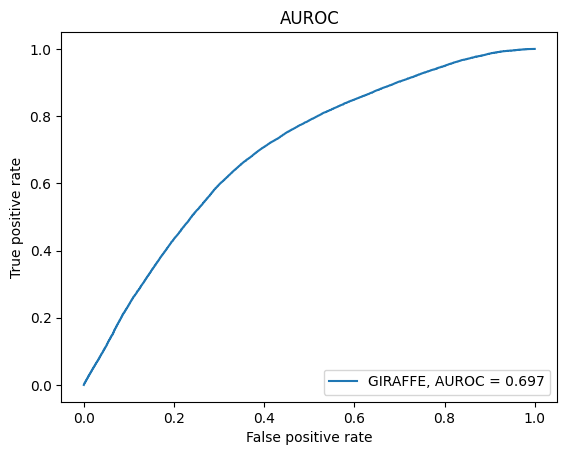

[0.697]

In [7]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [R_giraffe.to_numpy().flatten()], ['GIRAFFE'])

### 3.2 OTTER [2]

In [6]:
if cache:
    R_otter = pd.read_csv("data/breast/R_otter.csv", index_col = 0)
else:
    R_otter = otter(motif.T.to_numpy(), ppi + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy())).T
    pd.DataFrame(R_otter, index = motif.index, columns = motif.columns).to_csv("data/colon/R_otter.csv")

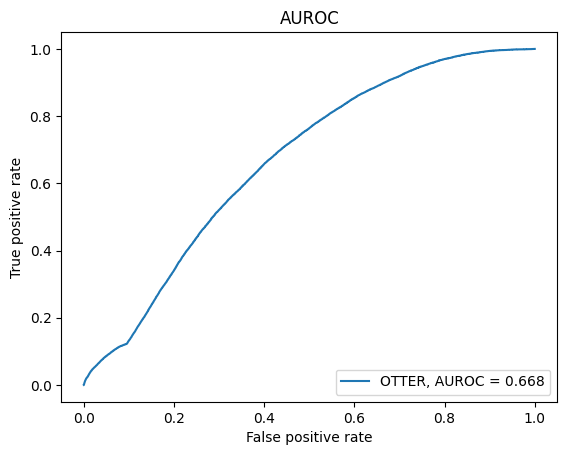

[0.668]

In [11]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [R_otter.T.flatten()], ['OTTER'])

### 3.3 PANDA [1]

In [7]:
R_panda_raw = pd.read_csv("data/breast/panda.csv", index_col = 0).T
R_panda = pd.DataFrame(0, index = motif.index, columns = motif.columns)
for g in R_panda_raw.index:
    for tf in R_panda_raw.columns:
        R_panda.at[g, tf] = R_panda_raw.at[g, tf]

### 3.4 Motif-based prior

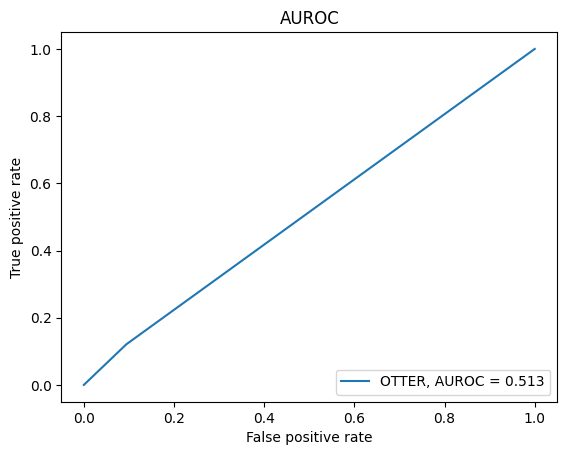

[0.513]

In [31]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [motif.to_numpy().flatten()], ['OTTER'])

### 3.5 GENIE3 [3]

In [10]:
model = notebooks.GENIE3(expression.to_numpy().T, gene_names = list(expression.index) ,regulators = list(expression.index), ntrees=5)

Tree method: RF
K: sqrt
Number of trees: 5


running single threaded jobs
Gene 1/30243...
Gene 2/30243...
Gene 3/30243...
Gene 4/30243...
Gene 5/30243...
Gene 6/30243...
Gene 7/30243...
Gene 8/30243...
Gene 9/30243...
Gene 10/30243...
Gene 11/30243...
Gene 12/30243...
Gene 13/30243...
Gene 14/30243...
Gene 15/30243...
Gene 16/30243...
Gene 17/30243...
Gene 18/30243...
Gene 19/30243...
Gene 20/30243...
Gene 21/30243...
Gene 22/30243...
Gene 23/30243...
Gene 24/30243...
Gene 25/30243...
Gene 26/30243...
Gene 27/30243...
Gene 28/30243...
Gene 29/30243...
Gene 30/30243...
Gene 31/30243...
Gene 32/30243...
Gene 33/30243...
Gene 34/30243...
Gene 35/30243...
Gene 36/30243...
Gene 37/30243...
Gene 38/30243...
Gene 39/30243...
Gene 40/30243...
Gene 41/30243...
Gene 42/30243...
Gene 43/30243...
Gene 44/30243...
Gene 45/30243...
Gene 46/30243...
Gene 47/30243...
Gene 48/30243...
Gene 49/30243...
Gene 50/30243...
Gene 51/30243...
Gene 52/30243...
Gene 53/30243...
Gene 54/30243...
Gene 55/30243...


Gene 459/30243...
Gene 460/30243...
Gene 461/30243...
Gene 462/30243...
Gene 463/30243...
Gene 464/30243...
Gene 465/30243...
Gene 466/30243...
Gene 467/30243...
Gene 468/30243...
Gene 469/30243...
Gene 470/30243...
Gene 471/30243...
Gene 472/30243...
Gene 473/30243...
Gene 474/30243...
Gene 475/30243...
Gene 476/30243...
Gene 477/30243...
Gene 478/30243...
Gene 479/30243...
Gene 480/30243...
Gene 481/30243...
Gene 482/30243...
Gene 483/30243...
Gene 484/30243...
Gene 485/30243...
Gene 486/30243...
Gene 487/30243...
Gene 488/30243...
Gene 489/30243...
Gene 490/30243...
Gene 491/30243...
Gene 492/30243...
Gene 493/30243...
Gene 494/30243...
Gene 495/30243...
Gene 496/30243...
Gene 497/30243...
Gene 498/30243...
Gene 499/30243...
Gene 500/30243...
Gene 501/30243...
Gene 502/30243...
Gene 503/30243...
Gene 504/30243...
Gene 505/30243...
Gene 506/30243...
Gene 507/30243...
Gene 508/30243...
Gene 509/30243...
Gene 510/30243...
Gene 511/30243...
Gene 512/30243...
Gene 513/30243...
Gene 514/3

Gene 915/30243...
Gene 916/30243...
Gene 917/30243...
Gene 918/30243...
Gene 919/30243...
Gene 920/30243...
Gene 921/30243...
Gene 922/30243...
Gene 923/30243...
Gene 924/30243...
Gene 925/30243...
Gene 926/30243...
Gene 927/30243...
Gene 928/30243...
Gene 929/30243...
Gene 930/30243...
Gene 931/30243...
Gene 932/30243...
Gene 933/30243...
Gene 934/30243...
Gene 935/30243...
Gene 936/30243...
Gene 937/30243...
Gene 938/30243...
Gene 939/30243...
Gene 940/30243...
Gene 941/30243...
Gene 942/30243...
Gene 943/30243...
Gene 944/30243...
Gene 945/30243...
Gene 946/30243...
Gene 947/30243...
Gene 948/30243...
Gene 949/30243...
Gene 950/30243...
Gene 951/30243...
Gene 952/30243...
Gene 953/30243...
Gene 954/30243...
Gene 955/30243...
Gene 956/30243...
Gene 957/30243...
Gene 958/30243...
Gene 959/30243...
Gene 960/30243...
Gene 961/30243...
Gene 962/30243...
Gene 963/30243...
Gene 964/30243...
Gene 965/30243...
Gene 966/30243...
Gene 967/30243...
Gene 968/30243...
Gene 969/30243...
Gene 970/3

Gene 1354/30243...
Gene 1355/30243...
Gene 1356/30243...
Gene 1357/30243...
Gene 1358/30243...
Gene 1359/30243...
Gene 1360/30243...
Gene 1361/30243...
Gene 1362/30243...
Gene 1363/30243...
Gene 1364/30243...
Gene 1365/30243...
Gene 1366/30243...
Gene 1367/30243...
Gene 1368/30243...
Gene 1369/30243...
Gene 1370/30243...
Gene 1371/30243...
Gene 1372/30243...
Gene 1373/30243...
Gene 1374/30243...
Gene 1375/30243...
Gene 1376/30243...
Gene 1377/30243...
Gene 1378/30243...
Gene 1379/30243...
Gene 1380/30243...
Gene 1381/30243...
Gene 1382/30243...
Gene 1383/30243...
Gene 1384/30243...
Gene 1385/30243...
Gene 1386/30243...
Gene 1387/30243...
Gene 1388/30243...
Gene 1389/30243...
Gene 1390/30243...
Gene 1391/30243...
Gene 1392/30243...
Gene 1393/30243...
Gene 1394/30243...
Gene 1395/30243...
Gene 1396/30243...
Gene 1397/30243...
Gene 1398/30243...
Gene 1399/30243...
Gene 1400/30243...
Gene 1401/30243...
Gene 1402/30243...
Gene 1403/30243...
Gene 1404/30243...
Gene 1405/30243...
Gene 1406/30

Gene 1787/30243...
Gene 1788/30243...
Gene 1789/30243...
Gene 1790/30243...
Gene 1791/30243...
Gene 1792/30243...
Gene 1793/30243...
Gene 1794/30243...
Gene 1795/30243...
Gene 1796/30243...
Gene 1797/30243...
Gene 1798/30243...
Gene 1799/30243...
Gene 1800/30243...
Gene 1801/30243...
Gene 1802/30243...
Gene 1803/30243...
Gene 1804/30243...
Gene 1805/30243...
Gene 1806/30243...
Gene 1807/30243...
Gene 1808/30243...
Gene 1809/30243...
Gene 1810/30243...
Gene 1811/30243...
Gene 1812/30243...
Gene 1813/30243...
Gene 1814/30243...
Gene 1815/30243...
Gene 1816/30243...
Gene 1817/30243...
Gene 1818/30243...
Gene 1819/30243...
Gene 1820/30243...
Gene 1821/30243...
Gene 1822/30243...
Gene 1823/30243...
Gene 1824/30243...
Gene 1825/30243...
Gene 1826/30243...
Gene 1827/30243...
Gene 1828/30243...
Gene 1829/30243...
Gene 1830/30243...
Gene 1831/30243...
Gene 1832/30243...
Gene 1833/30243...
Gene 1834/30243...
Gene 1835/30243...
Gene 1836/30243...
Gene 1837/30243...
Gene 1838/30243...
Gene 1839/30

Gene 2221/30243...
Gene 2222/30243...
Gene 2223/30243...
Gene 2224/30243...
Gene 2225/30243...
Gene 2226/30243...
Gene 2227/30243...
Gene 2228/30243...
Gene 2229/30243...
Gene 2230/30243...
Gene 2231/30243...
Gene 2232/30243...
Gene 2233/30243...
Gene 2234/30243...
Gene 2235/30243...
Gene 2236/30243...
Gene 2237/30243...
Gene 2238/30243...
Gene 2239/30243...
Gene 2240/30243...
Gene 2241/30243...
Gene 2242/30243...
Gene 2243/30243...
Gene 2244/30243...
Gene 2245/30243...
Gene 2246/30243...
Gene 2247/30243...
Gene 2248/30243...
Gene 2249/30243...
Gene 2250/30243...
Gene 2251/30243...
Gene 2252/30243...
Gene 2253/30243...
Gene 2254/30243...
Gene 2255/30243...
Gene 2256/30243...
Gene 2257/30243...
Gene 2258/30243...
Gene 2259/30243...
Gene 2260/30243...
Gene 2261/30243...
Gene 2262/30243...
Gene 2263/30243...
Gene 2264/30243...
Gene 2265/30243...
Gene 2266/30243...
Gene 2267/30243...
Gene 2268/30243...
Gene 2269/30243...
Gene 2270/30243...
Gene 2271/30243...
Gene 2272/30243...
Gene 2273/30

Gene 2654/30243...
Gene 2655/30243...
Gene 2656/30243...
Gene 2657/30243...
Gene 2658/30243...
Gene 2659/30243...
Gene 2660/30243...
Gene 2661/30243...
Gene 2662/30243...
Gene 2663/30243...
Gene 2664/30243...
Gene 2665/30243...
Gene 2666/30243...
Gene 2667/30243...
Gene 2668/30243...
Gene 2669/30243...
Gene 2670/30243...
Gene 2671/30243...
Gene 2672/30243...
Gene 2673/30243...
Gene 2674/30243...
Gene 2675/30243...
Gene 2676/30243...
Gene 2677/30243...
Gene 2678/30243...
Gene 2679/30243...
Gene 2680/30243...
Gene 2681/30243...
Gene 2682/30243...
Gene 2683/30243...
Gene 2684/30243...
Gene 2685/30243...
Gene 2686/30243...
Gene 2687/30243...
Gene 2688/30243...
Gene 2689/30243...
Gene 2690/30243...
Gene 2691/30243...
Gene 2692/30243...
Gene 2693/30243...
Gene 2694/30243...
Gene 2695/30243...
Gene 2696/30243...
Gene 2697/30243...
Gene 2698/30243...
Gene 2699/30243...
Gene 2700/30243...
Gene 2701/30243...
Gene 2702/30243...
Gene 2703/30243...
Gene 2704/30243...
Gene 2705/30243...
Gene 2706/30

Gene 3088/30243...
Gene 3089/30243...
Gene 3090/30243...
Gene 3091/30243...
Gene 3092/30243...
Gene 3093/30243...
Gene 3094/30243...
Gene 3095/30243...
Gene 3096/30243...
Gene 3097/30243...
Gene 3098/30243...
Gene 3099/30243...
Gene 3100/30243...
Gene 3101/30243...
Gene 3102/30243...
Gene 3103/30243...
Gene 3104/30243...
Gene 3105/30243...
Gene 3106/30243...
Gene 3107/30243...
Gene 3108/30243...
Gene 3109/30243...
Gene 3110/30243...
Gene 3111/30243...
Gene 3112/30243...
Gene 3113/30243...
Gene 3114/30243...
Gene 3115/30243...
Gene 3116/30243...
Gene 3117/30243...
Gene 3118/30243...
Gene 3119/30243...
Gene 3120/30243...
Gene 3121/30243...
Gene 3122/30243...
Gene 3123/30243...
Gene 3124/30243...
Gene 3125/30243...
Gene 3126/30243...
Gene 3127/30243...
Gene 3128/30243...
Gene 3129/30243...
Gene 3130/30243...
Gene 3131/30243...
Gene 3132/30243...
Gene 3133/30243...
Gene 3134/30243...
Gene 3135/30243...
Gene 3136/30243...
Gene 3137/30243...
Gene 3138/30243...
Gene 3139/30243...
Gene 3140/30

Gene 3520/30243...
Gene 3521/30243...
Gene 3522/30243...
Gene 3523/30243...
Gene 3524/30243...
Gene 3525/30243...
Gene 3526/30243...
Gene 3527/30243...
Gene 3528/30243...
Gene 3529/30243...
Gene 3530/30243...
Gene 3531/30243...
Gene 3532/30243...
Gene 3533/30243...
Gene 3534/30243...
Gene 3535/30243...
Gene 3536/30243...
Gene 3537/30243...
Gene 3538/30243...
Gene 3539/30243...
Gene 3540/30243...
Gene 3541/30243...
Gene 3542/30243...
Gene 3543/30243...
Gene 3544/30243...
Gene 3545/30243...
Gene 3546/30243...
Gene 3547/30243...
Gene 3548/30243...
Gene 3549/30243...
Gene 3550/30243...
Gene 3551/30243...
Gene 3552/30243...
Gene 3553/30243...
Gene 3554/30243...
Gene 3555/30243...
Gene 3556/30243...
Gene 3557/30243...
Gene 3558/30243...
Gene 3559/30243...
Gene 3560/30243...
Gene 3561/30243...
Gene 3562/30243...
Gene 3563/30243...
Gene 3564/30243...
Gene 3565/30243...
Gene 3566/30243...
Gene 3567/30243...
Gene 3568/30243...
Gene 3569/30243...
Gene 3570/30243...
Gene 3571/30243...
Gene 3572/30

Gene 3952/30243...
Gene 3953/30243...
Gene 3954/30243...
Gene 3955/30243...
Gene 3956/30243...
Gene 3957/30243...
Gene 3958/30243...
Gene 3959/30243...
Gene 3960/30243...
Gene 3961/30243...
Gene 3962/30243...
Gene 3963/30243...
Gene 3964/30243...
Gene 3965/30243...
Gene 3966/30243...
Gene 3967/30243...
Gene 3968/30243...
Gene 3969/30243...
Gene 3970/30243...
Gene 3971/30243...
Gene 3972/30243...
Gene 3973/30243...
Gene 3974/30243...
Gene 3975/30243...
Gene 3976/30243...
Gene 3977/30243...
Gene 3978/30243...
Gene 3979/30243...
Gene 3980/30243...
Gene 3981/30243...
Gene 3982/30243...
Gene 3983/30243...
Gene 3984/30243...
Gene 3985/30243...
Gene 3986/30243...
Gene 3987/30243...
Gene 3988/30243...
Gene 3989/30243...
Gene 3990/30243...
Gene 3991/30243...
Gene 3992/30243...
Gene 3993/30243...
Gene 3994/30243...
Gene 3995/30243...
Gene 3996/30243...
Gene 3997/30243...
Gene 3998/30243...
Gene 3999/30243...
Gene 4000/30243...
Gene 4001/30243...
Gene 4002/30243...
Gene 4003/30243...
Gene 4004/30

Gene 4384/30243...
Gene 4385/30243...
Gene 4386/30243...
Gene 4387/30243...
Gene 4388/30243...
Gene 4389/30243...
Gene 4390/30243...
Gene 4391/30243...
Gene 4392/30243...
Gene 4393/30243...
Gene 4394/30243...
Gene 4395/30243...
Gene 4396/30243...
Gene 4397/30243...
Gene 4398/30243...
Gene 4399/30243...
Gene 4400/30243...
Gene 4401/30243...
Gene 4402/30243...
Gene 4403/30243...
Gene 4404/30243...
Gene 4405/30243...
Gene 4406/30243...
Gene 4407/30243...
Gene 4408/30243...
Gene 4409/30243...
Gene 4410/30243...
Gene 4411/30243...
Gene 4412/30243...
Gene 4413/30243...
Gene 4414/30243...
Gene 4415/30243...
Gene 4416/30243...
Gene 4417/30243...
Gene 4418/30243...
Gene 4419/30243...
Gene 4420/30243...
Gene 4421/30243...
Gene 4422/30243...
Gene 4423/30243...
Gene 4424/30243...
Gene 4425/30243...
Gene 4426/30243...
Gene 4427/30243...
Gene 4428/30243...
Gene 4429/30243...
Gene 4430/30243...
Gene 4431/30243...
Gene 4432/30243...
Gene 4433/30243...
Gene 4434/30243...
Gene 4435/30243...
Gene 4436/30

Gene 4817/30243...
Gene 4818/30243...
Gene 4819/30243...
Gene 4820/30243...
Gene 4821/30243...
Gene 4822/30243...
Gene 4823/30243...
Gene 4824/30243...
Gene 4825/30243...
Gene 4826/30243...
Gene 4827/30243...
Gene 4828/30243...
Gene 4829/30243...
Gene 4830/30243...
Gene 4831/30243...
Gene 4832/30243...
Gene 4833/30243...
Gene 4834/30243...
Gene 4835/30243...
Gene 4836/30243...
Gene 4837/30243...
Gene 4838/30243...
Gene 4839/30243...
Gene 4840/30243...
Gene 4841/30243...
Gene 4842/30243...
Gene 4843/30243...
Gene 4844/30243...
Gene 4845/30243...
Gene 4846/30243...
Gene 4847/30243...
Gene 4848/30243...
Gene 4849/30243...
Gene 4850/30243...
Gene 4851/30243...
Gene 4852/30243...
Gene 4853/30243...
Gene 4854/30243...
Gene 4855/30243...
Gene 4856/30243...
Gene 4857/30243...
Gene 4858/30243...
Gene 4859/30243...
Gene 4860/30243...
Gene 4861/30243...
Gene 4862/30243...
Gene 4863/30243...
Gene 4864/30243...
Gene 4865/30243...
Gene 4866/30243...
Gene 4867/30243...
Gene 4868/30243...
Gene 4869/30

Gene 5251/30243...
Gene 5252/30243...
Gene 5253/30243...
Gene 5254/30243...
Gene 5255/30243...
Gene 5256/30243...
Gene 5257/30243...
Gene 5258/30243...
Gene 5259/30243...
Gene 5260/30243...
Gene 5261/30243...
Gene 5262/30243...
Gene 5263/30243...
Gene 5264/30243...
Gene 5265/30243...
Gene 5266/30243...
Gene 5267/30243...
Gene 5268/30243...
Gene 5269/30243...
Gene 5270/30243...
Gene 5271/30243...
Gene 5272/30243...
Gene 5273/30243...
Gene 5274/30243...
Gene 5275/30243...
Gene 5276/30243...
Gene 5277/30243...
Gene 5278/30243...
Gene 5279/30243...
Gene 5280/30243...
Gene 5281/30243...
Gene 5282/30243...
Gene 5283/30243...
Gene 5284/30243...
Gene 5285/30243...
Gene 5286/30243...
Gene 5287/30243...
Gene 5288/30243...
Gene 5289/30243...
Gene 5290/30243...
Gene 5291/30243...
Gene 5292/30243...
Gene 5293/30243...
Gene 5294/30243...
Gene 5295/30243...
Gene 5296/30243...
Gene 5297/30243...
Gene 5298/30243...
Gene 5299/30243...
Gene 5300/30243...
Gene 5301/30243...
Gene 5302/30243...
Gene 5303/30

Gene 5685/30243...
Gene 5686/30243...
Gene 5687/30243...
Gene 5688/30243...
Gene 5689/30243...
Gene 5690/30243...
Gene 5691/30243...
Gene 5692/30243...
Gene 5693/30243...
Gene 5694/30243...
Gene 5695/30243...
Gene 5696/30243...
Gene 5697/30243...
Gene 5698/30243...
Gene 5699/30243...
Gene 5700/30243...
Gene 5701/30243...
Gene 5702/30243...
Gene 5703/30243...
Gene 5704/30243...
Gene 5705/30243...
Gene 5706/30243...
Gene 5707/30243...
Gene 5708/30243...
Gene 5709/30243...
Gene 5710/30243...
Gene 5711/30243...
Gene 5712/30243...
Gene 5713/30243...
Gene 5714/30243...
Gene 5715/30243...
Gene 5716/30243...
Gene 5717/30243...
Gene 5718/30243...
Gene 5719/30243...
Gene 5720/30243...
Gene 5721/30243...
Gene 5722/30243...
Gene 5723/30243...
Gene 5724/30243...
Gene 5725/30243...
Gene 5726/30243...
Gene 5727/30243...
Gene 5728/30243...
Gene 5729/30243...
Gene 5730/30243...
Gene 5731/30243...
Gene 5732/30243...
Gene 5733/30243...
Gene 5734/30243...
Gene 5735/30243...
Gene 5736/30243...
Gene 5737/30

Gene 6119/30243...
Gene 6120/30243...
Gene 6121/30243...
Gene 6122/30243...
Gene 6123/30243...
Gene 6124/30243...
Gene 6125/30243...
Gene 6126/30243...
Gene 6127/30243...
Gene 6128/30243...
Gene 6129/30243...
Gene 6130/30243...
Gene 6131/30243...
Gene 6132/30243...
Gene 6133/30243...
Gene 6134/30243...
Gene 6135/30243...
Gene 6136/30243...
Gene 6137/30243...
Gene 6138/30243...
Gene 6139/30243...
Gene 6140/30243...
Gene 6141/30243...
Gene 6142/30243...
Gene 6143/30243...
Gene 6144/30243...
Gene 6145/30243...
Gene 6146/30243...
Gene 6147/30243...
Gene 6148/30243...
Gene 6149/30243...
Gene 6150/30243...
Gene 6151/30243...
Gene 6152/30243...
Gene 6153/30243...
Gene 6154/30243...
Gene 6155/30243...
Gene 6156/30243...
Gene 6157/30243...
Gene 6158/30243...
Gene 6159/30243...
Gene 6160/30243...
Gene 6161/30243...
Gene 6162/30243...
Gene 6163/30243...
Gene 6164/30243...
Gene 6165/30243...
Gene 6166/30243...
Gene 6167/30243...
Gene 6168/30243...
Gene 6169/30243...
Gene 6170/30243...
Gene 6171/30

Gene 6551/30243...
Gene 6552/30243...
Gene 6553/30243...
Gene 6554/30243...
Gene 6555/30243...
Gene 6556/30243...
Gene 6557/30243...
Gene 6558/30243...
Gene 6559/30243...
Gene 6560/30243...
Gene 6561/30243...
Gene 6562/30243...
Gene 6563/30243...
Gene 6564/30243...
Gene 6565/30243...
Gene 6566/30243...
Gene 6567/30243...
Gene 6568/30243...
Gene 6569/30243...
Gene 6570/30243...
Gene 6571/30243...
Gene 6572/30243...
Gene 6573/30243...
Gene 6574/30243...
Gene 6575/30243...
Gene 6576/30243...
Gene 6577/30243...
Gene 6578/30243...
Gene 6579/30243...
Gene 6580/30243...
Gene 6581/30243...
Gene 6582/30243...
Gene 6583/30243...
Gene 6584/30243...
Gene 6585/30243...
Gene 6586/30243...
Gene 6587/30243...
Gene 6588/30243...
Gene 6589/30243...
Gene 6590/30243...
Gene 6591/30243...
Gene 6592/30243...
Gene 6593/30243...
Gene 6594/30243...
Gene 6595/30243...
Gene 6596/30243...
Gene 6597/30243...
Gene 6598/30243...
Gene 6599/30243...
Gene 6600/30243...
Gene 6601/30243...
Gene 6602/30243...
Gene 6603/30

Gene 6983/30243...
Gene 6984/30243...
Gene 6985/30243...
Gene 6986/30243...
Gene 6987/30243...
Gene 6988/30243...
Gene 6989/30243...
Gene 6990/30243...
Gene 6991/30243...
Gene 6992/30243...
Gene 6993/30243...
Gene 6994/30243...
Gene 6995/30243...
Gene 6996/30243...
Gene 6997/30243...
Gene 6998/30243...
Gene 6999/30243...
Gene 7000/30243...
Gene 7001/30243...
Gene 7002/30243...
Gene 7003/30243...
Gene 7004/30243...
Gene 7005/30243...
Gene 7006/30243...
Gene 7007/30243...
Gene 7008/30243...
Gene 7009/30243...
Gene 7010/30243...
Gene 7011/30243...
Gene 7012/30243...
Gene 7013/30243...
Gene 7014/30243...
Gene 7015/30243...
Gene 7016/30243...
Gene 7017/30243...
Gene 7018/30243...
Gene 7019/30243...
Gene 7020/30243...
Gene 7021/30243...
Gene 7022/30243...
Gene 7023/30243...
Gene 7024/30243...
Gene 7025/30243...
Gene 7026/30243...
Gene 7027/30243...
Gene 7028/30243...
Gene 7029/30243...
Gene 7030/30243...
Gene 7031/30243...
Gene 7032/30243...
Gene 7033/30243...
Gene 7034/30243...
Gene 7035/30

Gene 7415/30243...
Gene 7416/30243...
Gene 7417/30243...
Gene 7418/30243...
Gene 7419/30243...
Gene 7420/30243...
Gene 7421/30243...
Gene 7422/30243...
Gene 7423/30243...
Gene 7424/30243...
Gene 7425/30243...
Gene 7426/30243...
Gene 7427/30243...
Gene 7428/30243...
Gene 7429/30243...
Gene 7430/30243...
Gene 7431/30243...
Gene 7432/30243...
Gene 7433/30243...
Gene 7434/30243...
Gene 7435/30243...
Gene 7436/30243...
Gene 7437/30243...
Gene 7438/30243...
Gene 7439/30243...
Gene 7440/30243...
Gene 7441/30243...
Gene 7442/30243...
Gene 7443/30243...
Gene 7444/30243...
Gene 7445/30243...
Gene 7446/30243...
Gene 7447/30243...
Gene 7448/30243...
Gene 7449/30243...
Gene 7450/30243...
Gene 7451/30243...
Gene 7452/30243...
Gene 7453/30243...
Gene 7454/30243...
Gene 7455/30243...
Gene 7456/30243...
Gene 7457/30243...
Gene 7458/30243...
Gene 7459/30243...
Gene 7460/30243...
Gene 7461/30243...
Gene 7462/30243...
Gene 7463/30243...
Gene 7464/30243...
Gene 7465/30243...
Gene 7466/30243...
Gene 7467/30

Gene 7847/30243...
Gene 7848/30243...
Gene 7849/30243...
Gene 7850/30243...
Gene 7851/30243...
Gene 7852/30243...
Gene 7853/30243...
Gene 7854/30243...
Gene 7855/30243...
Gene 7856/30243...
Gene 7857/30243...
Gene 7858/30243...
Gene 7859/30243...
Gene 7860/30243...
Gene 7861/30243...
Gene 7862/30243...
Gene 7863/30243...
Gene 7864/30243...
Gene 7865/30243...
Gene 7866/30243...
Gene 7867/30243...
Gene 7868/30243...
Gene 7869/30243...
Gene 7870/30243...
Gene 7871/30243...
Gene 7872/30243...
Gene 7873/30243...
Gene 7874/30243...
Gene 7875/30243...
Gene 7876/30243...
Gene 7877/30243...
Gene 7878/30243...
Gene 7879/30243...
Gene 7880/30243...
Gene 7881/30243...
Gene 7882/30243...
Gene 7883/30243...
Gene 7884/30243...
Gene 7885/30243...
Gene 7886/30243...
Gene 7887/30243...
Gene 7888/30243...
Gene 7889/30243...
Gene 7890/30243...
Gene 7891/30243...
Gene 7892/30243...
Gene 7893/30243...
Gene 7894/30243...
Gene 7895/30243...
Gene 7896/30243...
Gene 7897/30243...
Gene 7898/30243...
Gene 7899/30

Gene 8280/30243...
Gene 8281/30243...
Gene 8282/30243...
Gene 8283/30243...
Gene 8284/30243...
Gene 8285/30243...
Gene 8286/30243...
Gene 8287/30243...
Gene 8288/30243...
Gene 8289/30243...
Gene 8290/30243...
Gene 8291/30243...
Gene 8292/30243...
Gene 8293/30243...
Gene 8294/30243...
Gene 8295/30243...
Gene 8296/30243...
Gene 8297/30243...
Gene 8298/30243...
Gene 8299/30243...
Gene 8300/30243...
Gene 8301/30243...
Gene 8302/30243...
Gene 8303/30243...
Gene 8304/30243...
Gene 8305/30243...
Gene 8306/30243...
Gene 8307/30243...
Gene 8308/30243...
Gene 8309/30243...
Gene 8310/30243...
Gene 8311/30243...
Gene 8312/30243...
Gene 8313/30243...
Gene 8314/30243...
Gene 8315/30243...
Gene 8316/30243...
Gene 8317/30243...
Gene 8318/30243...
Gene 8319/30243...
Gene 8320/30243...
Gene 8321/30243...
Gene 8322/30243...
Gene 8323/30243...
Gene 8324/30243...
Gene 8325/30243...
Gene 8326/30243...
Gene 8327/30243...
Gene 8328/30243...
Gene 8329/30243...
Gene 8330/30243...
Gene 8331/30243...
Gene 8332/30

Gene 8714/30243...
Gene 8715/30243...
Gene 8716/30243...
Gene 8717/30243...
Gene 8718/30243...
Gene 8719/30243...
Gene 8720/30243...
Gene 8721/30243...
Gene 8722/30243...
Gene 8723/30243...
Gene 8724/30243...
Gene 8725/30243...
Gene 8726/30243...
Gene 8727/30243...
Gene 8728/30243...
Gene 8729/30243...
Gene 8730/30243...
Gene 8731/30243...
Gene 8732/30243...
Gene 8733/30243...
Gene 8734/30243...
Gene 8735/30243...
Gene 8736/30243...
Gene 8737/30243...
Gene 8738/30243...
Gene 8739/30243...
Gene 8740/30243...
Gene 8741/30243...
Gene 8742/30243...
Gene 8743/30243...
Gene 8744/30243...
Gene 8745/30243...
Gene 8746/30243...
Gene 8747/30243...
Gene 8748/30243...
Gene 8749/30243...
Gene 8750/30243...
Gene 8751/30243...
Gene 8752/30243...
Gene 8753/30243...
Gene 8754/30243...
Gene 8755/30243...
Gene 8756/30243...
Gene 8757/30243...
Gene 8758/30243...
Gene 8759/30243...
Gene 8760/30243...
Gene 8761/30243...
Gene 8762/30243...
Gene 8763/30243...
Gene 8764/30243...
Gene 8765/30243...
Gene 8766/30

Gene 9148/30243...
Gene 9149/30243...
Gene 9150/30243...
Gene 9151/30243...
Gene 9152/30243...
Gene 9153/30243...
Gene 9154/30243...
Gene 9155/30243...
Gene 9156/30243...
Gene 9157/30243...
Gene 9158/30243...
Gene 9159/30243...
Gene 9160/30243...
Gene 9161/30243...
Gene 9162/30243...
Gene 9163/30243...
Gene 9164/30243...
Gene 9165/30243...
Gene 9166/30243...
Gene 9167/30243...
Gene 9168/30243...
Gene 9169/30243...
Gene 9170/30243...
Gene 9171/30243...
Gene 9172/30243...
Gene 9173/30243...
Gene 9174/30243...
Gene 9175/30243...
Gene 9176/30243...
Gene 9177/30243...
Gene 9178/30243...
Gene 9179/30243...
Gene 9180/30243...
Gene 9181/30243...
Gene 9182/30243...
Gene 9183/30243...
Gene 9184/30243...
Gene 9185/30243...
Gene 9186/30243...
Gene 9187/30243...
Gene 9188/30243...
Gene 9189/30243...
Gene 9190/30243...
Gene 9191/30243...
Gene 9192/30243...
Gene 9193/30243...
Gene 9194/30243...
Gene 9195/30243...
Gene 9196/30243...
Gene 9197/30243...
Gene 9198/30243...
Gene 9199/30243...
Gene 9200/30

Gene 9580/30243...
Gene 9581/30243...
Gene 9582/30243...
Gene 9583/30243...
Gene 9584/30243...
Gene 9585/30243...
Gene 9586/30243...
Gene 9587/30243...
Gene 9588/30243...
Gene 9589/30243...
Gene 9590/30243...
Gene 9591/30243...
Gene 9592/30243...
Gene 9593/30243...
Gene 9594/30243...
Gene 9595/30243...
Gene 9596/30243...
Gene 9597/30243...
Gene 9598/30243...
Gene 9599/30243...
Gene 9600/30243...
Gene 9601/30243...
Gene 9602/30243...
Gene 9603/30243...
Gene 9604/30243...
Gene 9605/30243...
Gene 9606/30243...
Gene 9607/30243...
Gene 9608/30243...
Gene 9609/30243...
Gene 9610/30243...
Gene 9611/30243...
Gene 9612/30243...
Gene 9613/30243...
Gene 9614/30243...
Gene 9615/30243...
Gene 9616/30243...
Gene 9617/30243...
Gene 9618/30243...
Gene 9619/30243...
Gene 9620/30243...
Gene 9621/30243...
Gene 9622/30243...
Gene 9623/30243...
Gene 9624/30243...
Gene 9625/30243...
Gene 9626/30243...
Gene 9627/30243...
Gene 9628/30243...
Gene 9629/30243...
Gene 9630/30243...
Gene 9631/30243...
Gene 9632/30

Gene 10011/30243...
Gene 10012/30243...
Gene 10013/30243...
Gene 10014/30243...
Gene 10015/30243...
Gene 10016/30243...
Gene 10017/30243...
Gene 10018/30243...
Gene 10019/30243...
Gene 10020/30243...
Gene 10021/30243...
Gene 10022/30243...
Gene 10023/30243...
Gene 10024/30243...
Gene 10025/30243...
Gene 10026/30243...
Gene 10027/30243...
Gene 10028/30243...
Gene 10029/30243...
Gene 10030/30243...
Gene 10031/30243...
Gene 10032/30243...
Gene 10033/30243...
Gene 10034/30243...
Gene 10035/30243...
Gene 10036/30243...
Gene 10037/30243...
Gene 10038/30243...
Gene 10039/30243...
Gene 10040/30243...
Gene 10041/30243...
Gene 10042/30243...
Gene 10043/30243...
Gene 10044/30243...
Gene 10045/30243...
Gene 10046/30243...
Gene 10047/30243...
Gene 10048/30243...
Gene 10049/30243...
Gene 10050/30243...
Gene 10051/30243...
Gene 10052/30243...
Gene 10053/30243...
Gene 10054/30243...
Gene 10055/30243...
Gene 10056/30243...
Gene 10057/30243...
Gene 10058/30243...
Gene 10059/30243...
Gene 10060/30243...


Gene 10423/30243...
Gene 10424/30243...
Gene 10425/30243...
Gene 10426/30243...
Gene 10427/30243...
Gene 10428/30243...
Gene 10429/30243...
Gene 10430/30243...
Gene 10431/30243...
Gene 10432/30243...
Gene 10433/30243...
Gene 10434/30243...
Gene 10435/30243...
Gene 10436/30243...
Gene 10437/30243...
Gene 10438/30243...
Gene 10439/30243...
Gene 10440/30243...
Gene 10441/30243...
Gene 10442/30243...
Gene 10443/30243...
Gene 10444/30243...
Gene 10445/30243...
Gene 10446/30243...
Gene 10447/30243...
Gene 10448/30243...
Gene 10449/30243...
Gene 10450/30243...
Gene 10451/30243...
Gene 10452/30243...
Gene 10453/30243...
Gene 10454/30243...
Gene 10455/30243...
Gene 10456/30243...
Gene 10457/30243...
Gene 10458/30243...
Gene 10459/30243...
Gene 10460/30243...
Gene 10461/30243...
Gene 10462/30243...
Gene 10463/30243...
Gene 10464/30243...
Gene 10465/30243...
Gene 10466/30243...
Gene 10467/30243...
Gene 10468/30243...
Gene 10469/30243...
Gene 10470/30243...
Gene 10471/30243...
Gene 10472/30243...


Gene 10835/30243...
Gene 10836/30243...
Gene 10837/30243...
Gene 10838/30243...
Gene 10839/30243...
Gene 10840/30243...
Gene 10841/30243...
Gene 10842/30243...
Gene 10843/30243...
Gene 10844/30243...
Gene 10845/30243...
Gene 10846/30243...
Gene 10847/30243...
Gene 10848/30243...
Gene 10849/30243...
Gene 10850/30243...
Gene 10851/30243...
Gene 10852/30243...
Gene 10853/30243...
Gene 10854/30243...
Gene 10855/30243...
Gene 10856/30243...
Gene 10857/30243...
Gene 10858/30243...
Gene 10859/30243...
Gene 10860/30243...
Gene 10861/30243...
Gene 10862/30243...
Gene 10863/30243...
Gene 10864/30243...
Gene 10865/30243...
Gene 10866/30243...
Gene 10867/30243...
Gene 10868/30243...
Gene 10869/30243...
Gene 10870/30243...
Gene 10871/30243...
Gene 10872/30243...
Gene 10873/30243...
Gene 10874/30243...
Gene 10875/30243...
Gene 10876/30243...
Gene 10877/30243...
Gene 10878/30243...
Gene 10879/30243...
Gene 10880/30243...
Gene 10881/30243...
Gene 10882/30243...
Gene 10883/30243...
Gene 10884/30243...


Gene 11245/30243...
Gene 11246/30243...
Gene 11247/30243...
Gene 11248/30243...
Gene 11249/30243...
Gene 11250/30243...
Gene 11251/30243...
Gene 11252/30243...
Gene 11253/30243...
Gene 11254/30243...
Gene 11255/30243...
Gene 11256/30243...
Gene 11257/30243...
Gene 11258/30243...
Gene 11259/30243...
Gene 11260/30243...
Gene 11261/30243...
Gene 11262/30243...
Gene 11263/30243...
Gene 11264/30243...
Gene 11265/30243...
Gene 11266/30243...
Gene 11267/30243...
Gene 11268/30243...
Gene 11269/30243...
Gene 11270/30243...
Gene 11271/30243...
Gene 11272/30243...
Gene 11273/30243...
Gene 11274/30243...
Gene 11275/30243...
Gene 11276/30243...
Gene 11277/30243...
Gene 11278/30243...
Gene 11279/30243...
Gene 11280/30243...
Gene 11281/30243...
Gene 11282/30243...
Gene 11283/30243...
Gene 11284/30243...
Gene 11285/30243...
Gene 11286/30243...
Gene 11287/30243...
Gene 11288/30243...
Gene 11289/30243...
Gene 11290/30243...
Gene 11291/30243...
Gene 11292/30243...
Gene 11293/30243...
Gene 11294/30243...


Gene 11656/30243...
Gene 11657/30243...
Gene 11658/30243...
Gene 11659/30243...
Gene 11660/30243...
Gene 11661/30243...
Gene 11662/30243...
Gene 11663/30243...
Gene 11664/30243...
Gene 11665/30243...
Gene 11666/30243...
Gene 11667/30243...
Gene 11668/30243...
Gene 11669/30243...
Gene 11670/30243...
Gene 11671/30243...
Gene 11672/30243...
Gene 11673/30243...
Gene 11674/30243...
Gene 11675/30243...
Gene 11676/30243...
Gene 11677/30243...
Gene 11678/30243...
Gene 11679/30243...
Gene 11680/30243...
Gene 11681/30243...
Gene 11682/30243...
Gene 11683/30243...
Gene 11684/30243...
Gene 11685/30243...
Gene 11686/30243...
Gene 11687/30243...
Gene 11688/30243...
Gene 11689/30243...
Gene 11690/30243...
Gene 11691/30243...
Gene 11692/30243...
Gene 11693/30243...
Gene 11694/30243...
Gene 11695/30243...
Gene 11696/30243...
Gene 11697/30243...
Gene 11698/30243...
Gene 11699/30243...
Gene 11700/30243...
Gene 11701/30243...
Gene 11702/30243...
Gene 11703/30243...
Gene 11704/30243...
Gene 11705/30243...


Gene 12068/30243...
Gene 12069/30243...
Gene 12070/30243...
Gene 12071/30243...
Gene 12072/30243...
Gene 12073/30243...
Gene 12074/30243...
Gene 12075/30243...
Gene 12076/30243...
Gene 12077/30243...
Gene 12078/30243...
Gene 12079/30243...
Gene 12080/30243...
Gene 12081/30243...
Gene 12082/30243...
Gene 12083/30243...
Gene 12084/30243...
Gene 12085/30243...
Gene 12086/30243...
Gene 12087/30243...
Gene 12088/30243...
Gene 12089/30243...
Gene 12090/30243...
Gene 12091/30243...
Gene 12092/30243...
Gene 12093/30243...
Gene 12094/30243...
Gene 12095/30243...
Gene 12096/30243...
Gene 12097/30243...
Gene 12098/30243...
Gene 12099/30243...
Gene 12100/30243...
Gene 12101/30243...
Gene 12102/30243...
Gene 12103/30243...
Gene 12104/30243...
Gene 12105/30243...
Gene 12106/30243...
Gene 12107/30243...
Gene 12108/30243...
Gene 12109/30243...
Gene 12110/30243...
Gene 12111/30243...
Gene 12112/30243...
Gene 12113/30243...
Gene 12114/30243...
Gene 12115/30243...
Gene 12116/30243...
Gene 12117/30243...


Gene 12478/30243...
Gene 12479/30243...
Gene 12480/30243...
Gene 12481/30243...
Gene 12482/30243...
Gene 12483/30243...
Gene 12484/30243...
Gene 12485/30243...
Gene 12486/30243...
Gene 12487/30243...
Gene 12488/30243...
Gene 12489/30243...
Gene 12490/30243...
Gene 12491/30243...
Gene 12492/30243...
Gene 12493/30243...
Gene 12494/30243...
Gene 12495/30243...
Gene 12496/30243...
Gene 12497/30243...
Gene 12498/30243...
Gene 12499/30243...
Gene 12500/30243...
Gene 12501/30243...
Gene 12502/30243...
Gene 12503/30243...
Gene 12504/30243...
Gene 12505/30243...
Gene 12506/30243...
Gene 12507/30243...
Gene 12508/30243...
Gene 12509/30243...
Gene 12510/30243...
Gene 12511/30243...
Gene 12512/30243...
Gene 12513/30243...
Gene 12514/30243...
Gene 12515/30243...
Gene 12516/30243...
Gene 12517/30243...
Gene 12518/30243...
Gene 12519/30243...
Gene 12520/30243...
Gene 12521/30243...
Gene 12522/30243...
Gene 12523/30243...
Gene 12524/30243...
Gene 12525/30243...
Gene 12526/30243...
Gene 12527/30243...


Gene 12890/30243...
Gene 12891/30243...
Gene 12892/30243...
Gene 12893/30243...
Gene 12894/30243...
Gene 12895/30243...
Gene 12896/30243...
Gene 12897/30243...
Gene 12898/30243...
Gene 12899/30243...
Gene 12900/30243...
Gene 12901/30243...
Gene 12902/30243...
Gene 12903/30243...
Gene 12904/30243...
Gene 12905/30243...
Gene 12906/30243...
Gene 12907/30243...
Gene 12908/30243...
Gene 12909/30243...
Gene 12910/30243...
Gene 12911/30243...
Gene 12912/30243...
Gene 12913/30243...
Gene 12914/30243...
Gene 12915/30243...
Gene 12916/30243...
Gene 12917/30243...
Gene 12918/30243...
Gene 12919/30243...
Gene 12920/30243...
Gene 12921/30243...
Gene 12922/30243...
Gene 12923/30243...
Gene 12924/30243...
Gene 12925/30243...
Gene 12926/30243...
Gene 12927/30243...
Gene 12928/30243...
Gene 12929/30243...
Gene 12930/30243...
Gene 12931/30243...
Gene 12932/30243...
Gene 12933/30243...
Gene 12934/30243...
Gene 12935/30243...
Gene 12936/30243...
Gene 12937/30243...
Gene 12938/30243...
Gene 12939/30243...


Gene 13301/30243...
Gene 13302/30243...
Gene 13303/30243...
Gene 13304/30243...
Gene 13305/30243...
Gene 13306/30243...
Gene 13307/30243...
Gene 13308/30243...
Gene 13309/30243...
Gene 13310/30243...
Gene 13311/30243...
Gene 13312/30243...
Gene 13313/30243...
Gene 13314/30243...
Gene 13315/30243...
Gene 13316/30243...
Gene 13317/30243...
Gene 13318/30243...
Gene 13319/30243...
Gene 13320/30243...
Gene 13321/30243...
Gene 13322/30243...
Gene 13323/30243...
Gene 13324/30243...
Gene 13325/30243...
Gene 13326/30243...
Gene 13327/30243...
Gene 13328/30243...
Gene 13329/30243...
Gene 13330/30243...
Gene 13331/30243...
Gene 13332/30243...
Gene 13333/30243...
Gene 13334/30243...
Gene 13335/30243...
Gene 13336/30243...
Gene 13337/30243...
Gene 13338/30243...
Gene 13339/30243...
Gene 13340/30243...
Gene 13341/30243...
Gene 13342/30243...
Gene 13343/30243...
Gene 13344/30243...
Gene 13345/30243...
Gene 13346/30243...
Gene 13347/30243...
Gene 13348/30243...
Gene 13349/30243...
Gene 13350/30243...


Gene 13712/30243...
Gene 13713/30243...
Gene 13714/30243...
Gene 13715/30243...
Gene 13716/30243...
Gene 13717/30243...
Gene 13718/30243...
Gene 13719/30243...
Gene 13720/30243...
Gene 13721/30243...
Gene 13722/30243...
Gene 13723/30243...
Gene 13724/30243...
Gene 13725/30243...
Gene 13726/30243...
Gene 13727/30243...
Gene 13728/30243...
Gene 13729/30243...
Gene 13730/30243...
Gene 13731/30243...
Gene 13732/30243...
Gene 13733/30243...
Gene 13734/30243...
Gene 13735/30243...
Gene 13736/30243...
Gene 13737/30243...
Gene 13738/30243...
Gene 13739/30243...
Gene 13740/30243...
Gene 13741/30243...
Gene 13742/30243...
Gene 13743/30243...
Gene 13744/30243...
Gene 13745/30243...
Gene 13746/30243...
Gene 13747/30243...
Gene 13748/30243...
Gene 13749/30243...
Gene 13750/30243...
Gene 13751/30243...
Gene 13752/30243...
Gene 13753/30243...
Gene 13754/30243...
Gene 13755/30243...
Gene 13756/30243...
Gene 13757/30243...
Gene 13758/30243...
Gene 13759/30243...
Gene 13760/30243...
Gene 13761/30243...


Gene 14123/30243...
Gene 14124/30243...
Gene 14125/30243...
Gene 14126/30243...
Gene 14127/30243...
Gene 14128/30243...
Gene 14129/30243...
Gene 14130/30243...
Gene 14131/30243...
Gene 14132/30243...
Gene 14133/30243...
Gene 14134/30243...
Gene 14135/30243...
Gene 14136/30243...
Gene 14137/30243...
Gene 14138/30243...
Gene 14139/30243...
Gene 14140/30243...
Gene 14141/30243...
Gene 14142/30243...
Gene 14143/30243...
Gene 14144/30243...
Gene 14145/30243...
Gene 14146/30243...
Gene 14147/30243...
Gene 14148/30243...
Gene 14149/30243...
Gene 14150/30243...
Gene 14151/30243...
Gene 14152/30243...
Gene 14153/30243...
Gene 14154/30243...
Gene 14155/30243...
Gene 14156/30243...
Gene 14157/30243...
Gene 14158/30243...
Gene 14159/30243...
Gene 14160/30243...
Gene 14161/30243...
Gene 14162/30243...
Gene 14163/30243...
Gene 14164/30243...
Gene 14165/30243...
Gene 14166/30243...
Gene 14167/30243...
Gene 14168/30243...
Gene 14169/30243...
Gene 14170/30243...
Gene 14171/30243...
Gene 14172/30243...


Gene 14534/30243...
Gene 14535/30243...
Gene 14536/30243...
Gene 14537/30243...
Gene 14538/30243...
Gene 14539/30243...
Gene 14540/30243...
Gene 14541/30243...
Gene 14542/30243...
Gene 14543/30243...
Gene 14544/30243...
Gene 14545/30243...
Gene 14546/30243...
Gene 14547/30243...
Gene 14548/30243...
Gene 14549/30243...
Gene 14550/30243...
Gene 14551/30243...
Gene 14552/30243...
Gene 14553/30243...
Gene 14554/30243...
Gene 14555/30243...
Gene 14556/30243...
Gene 14557/30243...
Gene 14558/30243...
Gene 14559/30243...
Gene 14560/30243...
Gene 14561/30243...
Gene 14562/30243...
Gene 14563/30243...
Gene 14564/30243...
Gene 14565/30243...
Gene 14566/30243...
Gene 14567/30243...
Gene 14568/30243...
Gene 14569/30243...
Gene 14570/30243...
Gene 14571/30243...
Gene 14572/30243...
Gene 14573/30243...
Gene 14574/30243...
Gene 14575/30243...
Gene 14576/30243...
Gene 14577/30243...
Gene 14578/30243...
Gene 14579/30243...
Gene 14580/30243...
Gene 14581/30243...
Gene 14582/30243...
Gene 14583/30243...


Gene 14944/30243...
Gene 14945/30243...
Gene 14946/30243...
Gene 14947/30243...
Gene 14948/30243...
Gene 14949/30243...
Gene 14950/30243...
Gene 14951/30243...
Gene 14952/30243...
Gene 14953/30243...
Gene 14954/30243...
Gene 14955/30243...
Gene 14956/30243...
Gene 14957/30243...
Gene 14958/30243...
Gene 14959/30243...
Gene 14960/30243...
Gene 14961/30243...
Gene 14962/30243...
Gene 14963/30243...
Gene 14964/30243...
Gene 14965/30243...
Gene 14966/30243...
Gene 14967/30243...
Gene 14968/30243...
Gene 14969/30243...
Gene 14970/30243...
Gene 14971/30243...
Gene 14972/30243...
Gene 14973/30243...
Gene 14974/30243...
Gene 14975/30243...
Gene 14976/30243...
Gene 14977/30243...
Gene 14978/30243...
Gene 14979/30243...
Gene 14980/30243...
Gene 14981/30243...
Gene 14982/30243...
Gene 14983/30243...
Gene 14984/30243...
Gene 14985/30243...
Gene 14986/30243...
Gene 14987/30243...
Gene 14988/30243...
Gene 14989/30243...
Gene 14990/30243...
Gene 14991/30243...
Gene 14992/30243...
Gene 14993/30243...


Gene 15355/30243...
Gene 15356/30243...
Gene 15357/30243...
Gene 15358/30243...
Gene 15359/30243...
Gene 15360/30243...
Gene 15361/30243...
Gene 15362/30243...
Gene 15363/30243...
Gene 15364/30243...
Gene 15365/30243...
Gene 15366/30243...
Gene 15367/30243...
Gene 15368/30243...
Gene 15369/30243...
Gene 15370/30243...
Gene 15371/30243...
Gene 15372/30243...
Gene 15373/30243...
Gene 15374/30243...
Gene 15375/30243...
Gene 15376/30243...
Gene 15377/30243...
Gene 15378/30243...
Gene 15379/30243...
Gene 15380/30243...
Gene 15381/30243...
Gene 15382/30243...
Gene 15383/30243...
Gene 15384/30243...
Gene 15385/30243...
Gene 15386/30243...
Gene 15387/30243...
Gene 15388/30243...
Gene 15389/30243...
Gene 15390/30243...
Gene 15391/30243...
Gene 15392/30243...
Gene 15393/30243...
Gene 15394/30243...
Gene 15395/30243...
Gene 15396/30243...
Gene 15397/30243...
Gene 15398/30243...
Gene 15399/30243...
Gene 15400/30243...
Gene 15401/30243...
Gene 15402/30243...
Gene 15403/30243...
Gene 15404/30243...


Gene 15766/30243...
Gene 15767/30243...
Gene 15768/30243...
Gene 15769/30243...
Gene 15770/30243...
Gene 15771/30243...
Gene 15772/30243...
Gene 15773/30243...
Gene 15774/30243...
Gene 15775/30243...
Gene 15776/30243...
Gene 15777/30243...
Gene 15778/30243...
Gene 15779/30243...
Gene 15780/30243...
Gene 15781/30243...
Gene 15782/30243...
Gene 15783/30243...
Gene 15784/30243...
Gene 15785/30243...
Gene 15786/30243...
Gene 15787/30243...
Gene 15788/30243...
Gene 15789/30243...
Gene 15790/30243...
Gene 15791/30243...
Gene 15792/30243...
Gene 15793/30243...
Gene 15794/30243...
Gene 15795/30243...
Gene 15796/30243...
Gene 15797/30243...
Gene 15798/30243...
Gene 15799/30243...
Gene 15800/30243...
Gene 15801/30243...
Gene 15802/30243...
Gene 15803/30243...
Gene 15804/30243...
Gene 15805/30243...
Gene 15806/30243...
Gene 15807/30243...
Gene 15808/30243...
Gene 15809/30243...
Gene 15810/30243...
Gene 15811/30243...
Gene 15812/30243...
Gene 15813/30243...
Gene 15814/30243...
Gene 15815/30243...


Gene 16177/30243...
Gene 16178/30243...
Gene 16179/30243...
Gene 16180/30243...
Gene 16181/30243...
Gene 16182/30243...
Gene 16183/30243...
Gene 16184/30243...
Gene 16185/30243...
Gene 16186/30243...
Gene 16187/30243...
Gene 16188/30243...
Gene 16189/30243...
Gene 16190/30243...
Gene 16191/30243...
Gene 16192/30243...
Gene 16193/30243...
Gene 16194/30243...
Gene 16195/30243...
Gene 16196/30243...
Gene 16197/30243...
Gene 16198/30243...
Gene 16199/30243...
Gene 16200/30243...
Gene 16201/30243...
Gene 16202/30243...
Gene 16203/30243...
Gene 16204/30243...
Gene 16205/30243...
Gene 16206/30243...
Gene 16207/30243...
Gene 16208/30243...
Gene 16209/30243...
Gene 16210/30243...
Gene 16211/30243...
Gene 16212/30243...
Gene 16213/30243...
Gene 16214/30243...
Gene 16215/30243...
Gene 16216/30243...
Gene 16217/30243...
Gene 16218/30243...
Gene 16219/30243...
Gene 16220/30243...
Gene 16221/30243...
Gene 16222/30243...
Gene 16223/30243...
Gene 16224/30243...
Gene 16225/30243...
Gene 16226/30243...


Gene 16588/30243...
Gene 16589/30243...
Gene 16590/30243...
Gene 16591/30243...
Gene 16592/30243...
Gene 16593/30243...
Gene 16594/30243...
Gene 16595/30243...
Gene 16596/30243...
Gene 16597/30243...
Gene 16598/30243...
Gene 16599/30243...
Gene 16600/30243...
Gene 16601/30243...
Gene 16602/30243...
Gene 16603/30243...
Gene 16604/30243...
Gene 16605/30243...
Gene 16606/30243...
Gene 16607/30243...
Gene 16608/30243...
Gene 16609/30243...
Gene 16610/30243...
Gene 16611/30243...
Gene 16612/30243...
Gene 16613/30243...
Gene 16614/30243...
Gene 16615/30243...
Gene 16616/30243...
Gene 16617/30243...
Gene 16618/30243...
Gene 16619/30243...
Gene 16620/30243...
Gene 16621/30243...
Gene 16622/30243...
Gene 16623/30243...
Gene 16624/30243...
Gene 16625/30243...
Gene 16626/30243...
Gene 16627/30243...
Gene 16628/30243...
Gene 16629/30243...
Gene 16630/30243...
Gene 16631/30243...
Gene 16632/30243...
Gene 16633/30243...
Gene 16634/30243...
Gene 16635/30243...
Gene 16636/30243...
Gene 16637/30243...


Gene 16999/30243...
Gene 17000/30243...
Gene 17001/30243...
Gene 17002/30243...
Gene 17003/30243...
Gene 17004/30243...
Gene 17005/30243...
Gene 17006/30243...
Gene 17007/30243...
Gene 17008/30243...
Gene 17009/30243...
Gene 17010/30243...
Gene 17011/30243...
Gene 17012/30243...
Gene 17013/30243...
Gene 17014/30243...
Gene 17015/30243...
Gene 17016/30243...
Gene 17017/30243...
Gene 17018/30243...
Gene 17019/30243...
Gene 17020/30243...
Gene 17021/30243...
Gene 17022/30243...
Gene 17023/30243...
Gene 17024/30243...
Gene 17025/30243...
Gene 17026/30243...
Gene 17027/30243...
Gene 17028/30243...
Gene 17029/30243...
Gene 17030/30243...
Gene 17031/30243...
Gene 17032/30243...
Gene 17033/30243...
Gene 17034/30243...
Gene 17035/30243...
Gene 17036/30243...
Gene 17037/30243...
Gene 17038/30243...
Gene 17039/30243...
Gene 17040/30243...
Gene 17041/30243...
Gene 17042/30243...
Gene 17043/30243...
Gene 17044/30243...
Gene 17045/30243...
Gene 17046/30243...
Gene 17047/30243...
Gene 17048/30243...


Gene 17409/30243...
Gene 17410/30243...
Gene 17411/30243...
Gene 17412/30243...
Gene 17413/30243...
Gene 17414/30243...
Gene 17415/30243...
Gene 17416/30243...
Gene 17417/30243...
Gene 17418/30243...
Gene 17419/30243...
Gene 17420/30243...
Gene 17421/30243...
Gene 17422/30243...
Gene 17423/30243...
Gene 17424/30243...
Gene 17425/30243...
Gene 17426/30243...
Gene 17427/30243...
Gene 17428/30243...
Gene 17429/30243...
Gene 17430/30243...
Gene 17431/30243...
Gene 17432/30243...
Gene 17433/30243...
Gene 17434/30243...
Gene 17435/30243...
Gene 17436/30243...
Gene 17437/30243...
Gene 17438/30243...
Gene 17439/30243...
Gene 17440/30243...
Gene 17441/30243...
Gene 17442/30243...
Gene 17443/30243...
Gene 17444/30243...
Gene 17445/30243...
Gene 17446/30243...
Gene 17447/30243...
Gene 17448/30243...
Gene 17449/30243...
Gene 17450/30243...
Gene 17451/30243...
Gene 17452/30243...
Gene 17453/30243...
Gene 17454/30243...
Gene 17455/30243...
Gene 17456/30243...
Gene 17457/30243...
Gene 17458/30243...


Gene 17820/30243...
Gene 17821/30243...
Gene 17822/30243...
Gene 17823/30243...
Gene 17824/30243...
Gene 17825/30243...
Gene 17826/30243...
Gene 17827/30243...
Gene 17828/30243...
Gene 17829/30243...
Gene 17830/30243...
Gene 17831/30243...
Gene 17832/30243...
Gene 17833/30243...
Gene 17834/30243...
Gene 17835/30243...
Gene 17836/30243...
Gene 17837/30243...
Gene 17838/30243...
Gene 17839/30243...
Gene 17840/30243...
Gene 17841/30243...
Gene 17842/30243...
Gene 17843/30243...
Gene 17844/30243...
Gene 17845/30243...
Gene 17846/30243...
Gene 17847/30243...
Gene 17848/30243...
Gene 17849/30243...
Gene 17850/30243...
Gene 17851/30243...
Gene 17852/30243...
Gene 17853/30243...
Gene 17854/30243...
Gene 17855/30243...
Gene 17856/30243...
Gene 17857/30243...
Gene 17858/30243...
Gene 17859/30243...
Gene 17860/30243...
Gene 17861/30243...
Gene 17862/30243...
Gene 17863/30243...
Gene 17864/30243...
Gene 17865/30243...
Gene 17866/30243...
Gene 17867/30243...
Gene 17868/30243...
Gene 17869/30243...


Gene 18230/30243...
Gene 18231/30243...
Gene 18232/30243...
Gene 18233/30243...
Gene 18234/30243...
Gene 18235/30243...
Gene 18236/30243...
Gene 18237/30243...
Gene 18238/30243...
Gene 18239/30243...
Gene 18240/30243...
Gene 18241/30243...
Gene 18242/30243...
Gene 18243/30243...
Gene 18244/30243...
Gene 18245/30243...
Gene 18246/30243...
Gene 18247/30243...
Gene 18248/30243...
Gene 18249/30243...
Gene 18250/30243...
Gene 18251/30243...
Gene 18252/30243...
Gene 18253/30243...
Gene 18254/30243...
Gene 18255/30243...
Gene 18256/30243...
Gene 18257/30243...
Gene 18258/30243...
Gene 18259/30243...
Gene 18260/30243...
Gene 18261/30243...
Gene 18262/30243...
Gene 18263/30243...
Gene 18264/30243...
Gene 18265/30243...
Gene 18266/30243...
Gene 18267/30243...
Gene 18268/30243...
Gene 18269/30243...
Gene 18270/30243...
Gene 18271/30243...
Gene 18272/30243...
Gene 18273/30243...
Gene 18274/30243...
Gene 18275/30243...
Gene 18276/30243...
Gene 18277/30243...
Gene 18278/30243...
Gene 18279/30243...


Gene 18641/30243...
Gene 18642/30243...
Gene 18643/30243...
Gene 18644/30243...
Gene 18645/30243...
Gene 18646/30243...
Gene 18647/30243...
Gene 18648/30243...
Gene 18649/30243...
Gene 18650/30243...
Gene 18651/30243...
Gene 18652/30243...
Gene 18653/30243...
Gene 18654/30243...
Gene 18655/30243...
Gene 18656/30243...
Gene 18657/30243...
Gene 18658/30243...
Gene 18659/30243...
Gene 18660/30243...
Gene 18661/30243...
Gene 18662/30243...
Gene 18663/30243...
Gene 18664/30243...
Gene 18665/30243...
Gene 18666/30243...
Gene 18667/30243...
Gene 18668/30243...
Gene 18669/30243...
Gene 18670/30243...
Gene 18671/30243...
Gene 18672/30243...
Gene 18673/30243...
Gene 18674/30243...
Gene 18675/30243...
Gene 18676/30243...
Gene 18677/30243...
Gene 18678/30243...
Gene 18679/30243...
Gene 18680/30243...
Gene 18681/30243...
Gene 18682/30243...
Gene 18683/30243...
Gene 18684/30243...
Gene 18685/30243...
Gene 18686/30243...
Gene 18687/30243...
Gene 18688/30243...
Gene 18689/30243...
Gene 18690/30243...


Gene 19051/30243...
Gene 19052/30243...
Gene 19053/30243...
Gene 19054/30243...
Gene 19055/30243...
Gene 19056/30243...
Gene 19057/30243...
Gene 19058/30243...
Gene 19059/30243...
Gene 19060/30243...
Gene 19061/30243...
Gene 19062/30243...
Gene 19063/30243...
Gene 19064/30243...
Gene 19065/30243...
Gene 19066/30243...
Gene 19067/30243...
Gene 19068/30243...
Gene 19069/30243...
Gene 19070/30243...
Gene 19071/30243...
Gene 19072/30243...
Gene 19073/30243...
Gene 19074/30243...
Gene 19075/30243...
Gene 19076/30243...
Gene 19077/30243...
Gene 19078/30243...
Gene 19079/30243...
Gene 19080/30243...
Gene 19081/30243...
Gene 19082/30243...
Gene 19083/30243...
Gene 19084/30243...
Gene 19085/30243...
Gene 19086/30243...
Gene 19087/30243...
Gene 19088/30243...
Gene 19089/30243...
Gene 19090/30243...
Gene 19091/30243...
Gene 19092/30243...
Gene 19093/30243...
Gene 19094/30243...
Gene 19095/30243...
Gene 19096/30243...
Gene 19097/30243...
Gene 19098/30243...
Gene 19099/30243...
Gene 19100/30243...


Gene 19461/30243...
Gene 19462/30243...
Gene 19463/30243...
Gene 19464/30243...
Gene 19465/30243...
Gene 19466/30243...
Gene 19467/30243...
Gene 19468/30243...
Gene 19469/30243...
Gene 19470/30243...
Gene 19471/30243...
Gene 19472/30243...
Gene 19473/30243...
Gene 19474/30243...
Gene 19475/30243...
Gene 19476/30243...
Gene 19477/30243...
Gene 19478/30243...
Gene 19479/30243...
Gene 19480/30243...
Gene 19481/30243...
Gene 19482/30243...
Gene 19483/30243...
Gene 19484/30243...
Gene 19485/30243...
Gene 19486/30243...
Gene 19487/30243...
Gene 19488/30243...
Gene 19489/30243...
Gene 19490/30243...
Gene 19491/30243...
Gene 19492/30243...
Gene 19493/30243...
Gene 19494/30243...
Gene 19495/30243...
Gene 19496/30243...
Gene 19497/30243...
Gene 19498/30243...
Gene 19499/30243...
Gene 19500/30243...
Gene 19501/30243...
Gene 19502/30243...
Gene 19503/30243...
Gene 19504/30243...
Gene 19505/30243...
Gene 19506/30243...
Gene 19507/30243...
Gene 19508/30243...
Gene 19509/30243...
Gene 19510/30243...


Gene 19872/30243...
Gene 19873/30243...
Gene 19874/30243...
Gene 19875/30243...
Gene 19876/30243...
Gene 19877/30243...
Gene 19878/30243...
Gene 19879/30243...
Gene 19880/30243...
Gene 19881/30243...
Gene 19882/30243...
Gene 19883/30243...
Gene 19884/30243...
Gene 19885/30243...
Gene 19886/30243...
Gene 19887/30243...
Gene 19888/30243...
Gene 19889/30243...
Gene 19890/30243...
Gene 19891/30243...
Gene 19892/30243...
Gene 19893/30243...
Gene 19894/30243...
Gene 19895/30243...
Gene 19896/30243...
Gene 19897/30243...
Gene 19898/30243...
Gene 19899/30243...
Gene 19900/30243...
Gene 19901/30243...
Gene 19902/30243...
Gene 19903/30243...
Gene 19904/30243...
Gene 19905/30243...
Gene 19906/30243...
Gene 19907/30243...
Gene 19908/30243...
Gene 19909/30243...
Gene 19910/30243...
Gene 19911/30243...
Gene 19912/30243...
Gene 19913/30243...
Gene 19914/30243...
Gene 19915/30243...
Gene 19916/30243...
Gene 19917/30243...
Gene 19918/30243...
Gene 19919/30243...
Gene 19920/30243...
Gene 19921/30243...


Gene 20282/30243...
Gene 20283/30243...
Gene 20284/30243...
Gene 20285/30243...
Gene 20286/30243...
Gene 20287/30243...
Gene 20288/30243...
Gene 20289/30243...
Gene 20290/30243...
Gene 20291/30243...
Gene 20292/30243...
Gene 20293/30243...
Gene 20294/30243...
Gene 20295/30243...
Gene 20296/30243...
Gene 20297/30243...
Gene 20298/30243...
Gene 20299/30243...
Gene 20300/30243...
Gene 20301/30243...
Gene 20302/30243...
Gene 20303/30243...
Gene 20304/30243...
Gene 20305/30243...
Gene 20306/30243...
Gene 20307/30243...
Gene 20308/30243...
Gene 20309/30243...
Gene 20310/30243...
Gene 20311/30243...
Gene 20312/30243...
Gene 20313/30243...
Gene 20314/30243...
Gene 20315/30243...
Gene 20316/30243...
Gene 20317/30243...
Gene 20318/30243...
Gene 20319/30243...
Gene 20320/30243...
Gene 20321/30243...
Gene 20322/30243...
Gene 20323/30243...
Gene 20324/30243...
Gene 20325/30243...
Gene 20326/30243...
Gene 20327/30243...
Gene 20328/30243...
Gene 20329/30243...
Gene 20330/30243...
Gene 20331/30243...


Gene 20694/30243...
Gene 20695/30243...
Gene 20696/30243...
Gene 20697/30243...
Gene 20698/30243...
Gene 20699/30243...
Gene 20700/30243...
Gene 20701/30243...
Gene 20702/30243...
Gene 20703/30243...
Gene 20704/30243...
Gene 20705/30243...
Gene 20706/30243...
Gene 20707/30243...
Gene 20708/30243...
Gene 20709/30243...
Gene 20710/30243...
Gene 20711/30243...
Gene 20712/30243...
Gene 20713/30243...
Gene 20714/30243...
Gene 20715/30243...
Gene 20716/30243...
Gene 20717/30243...
Gene 20718/30243...
Gene 20719/30243...
Gene 20720/30243...
Gene 20721/30243...
Gene 20722/30243...
Gene 20723/30243...
Gene 20724/30243...
Gene 20725/30243...
Gene 20726/30243...
Gene 20727/30243...
Gene 20728/30243...
Gene 20729/30243...
Gene 20730/30243...
Gene 20731/30243...
Gene 20732/30243...
Gene 20733/30243...
Gene 20734/30243...
Gene 20735/30243...
Gene 20736/30243...
Gene 20737/30243...
Gene 20738/30243...
Gene 20739/30243...
Gene 20740/30243...
Gene 20741/30243...
Gene 20742/30243...
Gene 20743/30243...


Gene 21104/30243...
Gene 21105/30243...
Gene 21106/30243...
Gene 21107/30243...
Gene 21108/30243...
Gene 21109/30243...
Gene 21110/30243...
Gene 21111/30243...
Gene 21112/30243...
Gene 21113/30243...
Gene 21114/30243...
Gene 21115/30243...
Gene 21116/30243...
Gene 21117/30243...
Gene 21118/30243...
Gene 21119/30243...
Gene 21120/30243...
Gene 21121/30243...
Gene 21122/30243...
Gene 21123/30243...
Gene 21124/30243...
Gene 21125/30243...
Gene 21126/30243...
Gene 21127/30243...
Gene 21128/30243...
Gene 21129/30243...
Gene 21130/30243...
Gene 21131/30243...
Gene 21132/30243...
Gene 21133/30243...
Gene 21134/30243...
Gene 21135/30243...
Gene 21136/30243...
Gene 21137/30243...
Gene 21138/30243...
Gene 21139/30243...
Gene 21140/30243...
Gene 21141/30243...
Gene 21142/30243...
Gene 21143/30243...
Gene 21144/30243...
Gene 21145/30243...
Gene 21146/30243...
Gene 21147/30243...
Gene 21148/30243...
Gene 21149/30243...
Gene 21150/30243...
Gene 21151/30243...
Gene 21152/30243...
Gene 21153/30243...


Gene 21516/30243...
Gene 21517/30243...
Gene 21518/30243...
Gene 21519/30243...
Gene 21520/30243...
Gene 21521/30243...
Gene 21522/30243...
Gene 21523/30243...
Gene 21524/30243...
Gene 21525/30243...
Gene 21526/30243...
Gene 21527/30243...
Gene 21528/30243...
Gene 21529/30243...
Gene 21530/30243...
Gene 21531/30243...
Gene 21532/30243...
Gene 21533/30243...
Gene 21534/30243...
Gene 21535/30243...
Gene 21536/30243...
Gene 21537/30243...
Gene 21538/30243...
Gene 21539/30243...
Gene 21540/30243...
Gene 21541/30243...
Gene 21542/30243...
Gene 21543/30243...
Gene 21544/30243...
Gene 21545/30243...
Gene 21546/30243...
Gene 21547/30243...
Gene 21548/30243...
Gene 21549/30243...
Gene 21550/30243...
Gene 21551/30243...
Gene 21552/30243...
Gene 21553/30243...
Gene 21554/30243...
Gene 21555/30243...
Gene 21556/30243...
Gene 21557/30243...
Gene 21558/30243...
Gene 21559/30243...
Gene 21560/30243...
Gene 21561/30243...
Gene 21562/30243...
Gene 21563/30243...
Gene 21564/30243...
Gene 21565/30243...


Gene 21927/30243...
Gene 21928/30243...
Gene 21929/30243...
Gene 21930/30243...
Gene 21931/30243...
Gene 21932/30243...
Gene 21933/30243...
Gene 21934/30243...
Gene 21935/30243...
Gene 21936/30243...
Gene 21937/30243...
Gene 21938/30243...
Gene 21939/30243...
Gene 21940/30243...
Gene 21941/30243...
Gene 21942/30243...
Gene 21943/30243...
Gene 21944/30243...
Gene 21945/30243...
Gene 21946/30243...
Gene 21947/30243...
Gene 21948/30243...
Gene 21949/30243...
Gene 21950/30243...
Gene 21951/30243...
Gene 21952/30243...
Gene 21953/30243...
Gene 21954/30243...
Gene 21955/30243...
Gene 21956/30243...
Gene 21957/30243...
Gene 21958/30243...
Gene 21959/30243...
Gene 21960/30243...
Gene 21961/30243...
Gene 21962/30243...
Gene 21963/30243...
Gene 21964/30243...
Gene 21965/30243...
Gene 21966/30243...
Gene 21967/30243...
Gene 21968/30243...
Gene 21969/30243...
Gene 21970/30243...
Gene 21971/30243...
Gene 21972/30243...
Gene 21973/30243...
Gene 21974/30243...
Gene 21975/30243...
Gene 21976/30243...


Gene 22339/30243...
Gene 22340/30243...
Gene 22341/30243...
Gene 22342/30243...
Gene 22343/30243...
Gene 22344/30243...
Gene 22345/30243...
Gene 22346/30243...
Gene 22347/30243...
Gene 22348/30243...
Gene 22349/30243...
Gene 22350/30243...
Gene 22351/30243...
Gene 22352/30243...
Gene 22353/30243...
Gene 22354/30243...
Gene 22355/30243...
Gene 22356/30243...
Gene 22357/30243...
Gene 22358/30243...
Gene 22359/30243...
Gene 22360/30243...
Gene 22361/30243...
Gene 22362/30243...
Gene 22363/30243...
Gene 22364/30243...
Gene 22365/30243...
Gene 22366/30243...
Gene 22367/30243...
Gene 22368/30243...
Gene 22369/30243...
Gene 22370/30243...
Gene 22371/30243...
Gene 22372/30243...
Gene 22373/30243...
Gene 22374/30243...
Gene 22375/30243...
Gene 22376/30243...
Gene 22377/30243...
Gene 22378/30243...
Gene 22379/30243...
Gene 22380/30243...
Gene 22381/30243...
Gene 22382/30243...
Gene 22383/30243...
Gene 22384/30243...
Gene 22385/30243...
Gene 22386/30243...
Gene 22387/30243...
Gene 22388/30243...


Gene 22750/30243...
Gene 22751/30243...
Gene 22752/30243...
Gene 22753/30243...
Gene 22754/30243...
Gene 22755/30243...
Gene 22756/30243...
Gene 22757/30243...
Gene 22758/30243...
Gene 22759/30243...
Gene 22760/30243...
Gene 22761/30243...
Gene 22762/30243...
Gene 22763/30243...
Gene 22764/30243...
Gene 22765/30243...
Gene 22766/30243...
Gene 22767/30243...
Gene 22768/30243...
Gene 22769/30243...
Gene 22770/30243...
Gene 22771/30243...
Gene 22772/30243...
Gene 22773/30243...
Gene 22774/30243...
Gene 22775/30243...
Gene 22776/30243...
Gene 22777/30243...
Gene 22778/30243...
Gene 22779/30243...
Gene 22780/30243...
Gene 22781/30243...
Gene 22782/30243...
Gene 22783/30243...
Gene 22784/30243...
Gene 22785/30243...
Gene 22786/30243...
Gene 22787/30243...
Gene 22788/30243...
Gene 22789/30243...
Gene 22790/30243...
Gene 22791/30243...
Gene 22792/30243...
Gene 22793/30243...
Gene 22794/30243...
Gene 22795/30243...
Gene 22796/30243...
Gene 22797/30243...
Gene 22798/30243...
Gene 22799/30243...


Gene 23161/30243...
Gene 23162/30243...
Gene 23163/30243...
Gene 23164/30243...
Gene 23165/30243...
Gene 23166/30243...
Gene 23167/30243...
Gene 23168/30243...
Gene 23169/30243...
Gene 23170/30243...
Gene 23171/30243...
Gene 23172/30243...
Gene 23173/30243...
Gene 23174/30243...
Gene 23175/30243...
Gene 23176/30243...
Gene 23177/30243...
Gene 23178/30243...
Gene 23179/30243...
Gene 23180/30243...
Gene 23181/30243...
Gene 23182/30243...
Gene 23183/30243...
Gene 23184/30243...
Gene 23185/30243...
Gene 23186/30243...
Gene 23187/30243...
Gene 23188/30243...
Gene 23189/30243...
Gene 23190/30243...
Gene 23191/30243...
Gene 23192/30243...
Gene 23193/30243...
Gene 23194/30243...
Gene 23195/30243...
Gene 23196/30243...
Gene 23197/30243...
Gene 23198/30243...
Gene 23199/30243...
Gene 23200/30243...
Gene 23201/30243...
Gene 23202/30243...
Gene 23203/30243...
Gene 23204/30243...
Gene 23205/30243...
Gene 23206/30243...
Gene 23207/30243...
Gene 23208/30243...
Gene 23209/30243...
Gene 23210/30243...


Gene 23573/30243...
Gene 23574/30243...
Gene 23575/30243...
Gene 23576/30243...
Gene 23577/30243...
Gene 23578/30243...
Gene 23579/30243...
Gene 23580/30243...
Gene 23581/30243...
Gene 23582/30243...
Gene 23583/30243...
Gene 23584/30243...
Gene 23585/30243...
Gene 23586/30243...
Gene 23587/30243...
Gene 23588/30243...
Gene 23589/30243...
Gene 23590/30243...
Gene 23591/30243...
Gene 23592/30243...
Gene 23593/30243...
Gene 23594/30243...
Gene 23595/30243...
Gene 23596/30243...
Gene 23597/30243...
Gene 23598/30243...
Gene 23599/30243...
Gene 23600/30243...
Gene 23601/30243...
Gene 23602/30243...
Gene 23603/30243...
Gene 23604/30243...
Gene 23605/30243...
Gene 23606/30243...
Gene 23607/30243...
Gene 23608/30243...
Gene 23609/30243...
Gene 23610/30243...
Gene 23611/30243...
Gene 23612/30243...
Gene 23613/30243...
Gene 23614/30243...
Gene 23615/30243...
Gene 23616/30243...
Gene 23617/30243...
Gene 23618/30243...
Gene 23619/30243...
Gene 23620/30243...
Gene 23621/30243...
Gene 23622/30243...


Gene 23985/30243...
Gene 23986/30243...
Gene 23987/30243...
Gene 23988/30243...
Gene 23989/30243...
Gene 23990/30243...
Gene 23991/30243...
Gene 23992/30243...
Gene 23993/30243...
Gene 23994/30243...
Gene 23995/30243...
Gene 23996/30243...
Gene 23997/30243...
Gene 23998/30243...
Gene 23999/30243...
Gene 24000/30243...
Gene 24001/30243...
Gene 24002/30243...
Gene 24003/30243...
Gene 24004/30243...
Gene 24005/30243...
Gene 24006/30243...
Gene 24007/30243...
Gene 24008/30243...
Gene 24009/30243...
Gene 24010/30243...
Gene 24011/30243...
Gene 24012/30243...
Gene 24013/30243...
Gene 24014/30243...
Gene 24015/30243...
Gene 24016/30243...
Gene 24017/30243...
Gene 24018/30243...
Gene 24019/30243...
Gene 24020/30243...
Gene 24021/30243...
Gene 24022/30243...
Gene 24023/30243...
Gene 24024/30243...
Gene 24025/30243...
Gene 24026/30243...
Gene 24027/30243...
Gene 24028/30243...
Gene 24029/30243...
Gene 24030/30243...
Gene 24031/30243...
Gene 24032/30243...
Gene 24033/30243...
Gene 24034/30243...


Gene 24396/30243...
Gene 24397/30243...
Gene 24398/30243...
Gene 24399/30243...
Gene 24400/30243...
Gene 24401/30243...
Gene 24402/30243...
Gene 24403/30243...
Gene 24404/30243...
Gene 24405/30243...
Gene 24406/30243...
Gene 24407/30243...
Gene 24408/30243...
Gene 24409/30243...
Gene 24410/30243...
Gene 24411/30243...
Gene 24412/30243...
Gene 24413/30243...
Gene 24414/30243...
Gene 24415/30243...
Gene 24416/30243...
Gene 24417/30243...
Gene 24418/30243...
Gene 24419/30243...
Gene 24420/30243...
Gene 24421/30243...
Gene 24422/30243...
Gene 24423/30243...
Gene 24424/30243...
Gene 24425/30243...
Gene 24426/30243...
Gene 24427/30243...
Gene 24428/30243...
Gene 24429/30243...
Gene 24430/30243...
Gene 24431/30243...
Gene 24432/30243...
Gene 24433/30243...
Gene 24434/30243...
Gene 24435/30243...
Gene 24436/30243...
Gene 24437/30243...
Gene 24438/30243...
Gene 24439/30243...
Gene 24440/30243...
Gene 24441/30243...
Gene 24442/30243...
Gene 24443/30243...
Gene 24444/30243...
Gene 24445/30243...


Gene 24806/30243...
Gene 24807/30243...
Gene 24808/30243...
Gene 24809/30243...
Gene 24810/30243...
Gene 24811/30243...
Gene 24812/30243...
Gene 24813/30243...
Gene 24814/30243...
Gene 24815/30243...
Gene 24816/30243...
Gene 24817/30243...
Gene 24818/30243...
Gene 24819/30243...
Gene 24820/30243...
Gene 24821/30243...
Gene 24822/30243...
Gene 24823/30243...
Gene 24824/30243...
Gene 24825/30243...
Gene 24826/30243...
Gene 24827/30243...
Gene 24828/30243...
Gene 24829/30243...
Gene 24830/30243...
Gene 24831/30243...
Gene 24832/30243...
Gene 24833/30243...
Gene 24834/30243...
Gene 24835/30243...
Gene 24836/30243...
Gene 24837/30243...
Gene 24838/30243...
Gene 24839/30243...
Gene 24840/30243...
Gene 24841/30243...
Gene 24842/30243...
Gene 24843/30243...
Gene 24844/30243...
Gene 24845/30243...
Gene 24846/30243...
Gene 24847/30243...
Gene 24848/30243...
Gene 24849/30243...
Gene 24850/30243...
Gene 24851/30243...
Gene 24852/30243...
Gene 24853/30243...
Gene 24854/30243...
Gene 24855/30243...


Gene 25217/30243...
Gene 25218/30243...
Gene 25219/30243...
Gene 25220/30243...
Gene 25221/30243...
Gene 25222/30243...
Gene 25223/30243...
Gene 25224/30243...
Gene 25225/30243...
Gene 25226/30243...
Gene 25227/30243...
Gene 25228/30243...
Gene 25229/30243...
Gene 25230/30243...
Gene 25231/30243...
Gene 25232/30243...
Gene 25233/30243...
Gene 25234/30243...
Gene 25235/30243...
Gene 25236/30243...
Gene 25237/30243...
Gene 25238/30243...
Gene 25239/30243...
Gene 25240/30243...
Gene 25241/30243...
Gene 25242/30243...
Gene 25243/30243...
Gene 25244/30243...
Gene 25245/30243...
Gene 25246/30243...
Gene 25247/30243...
Gene 25248/30243...
Gene 25249/30243...
Gene 25250/30243...
Gene 25251/30243...
Gene 25252/30243...
Gene 25253/30243...
Gene 25254/30243...
Gene 25255/30243...
Gene 25256/30243...
Gene 25257/30243...
Gene 25258/30243...
Gene 25259/30243...
Gene 25260/30243...
Gene 25261/30243...
Gene 25262/30243...
Gene 25263/30243...
Gene 25264/30243...
Gene 25265/30243...
Gene 25266/30243...


Gene 25627/30243...
Gene 25628/30243...
Gene 25629/30243...
Gene 25630/30243...
Gene 25631/30243...
Gene 25632/30243...
Gene 25633/30243...
Gene 25634/30243...
Gene 25635/30243...
Gene 25636/30243...
Gene 25637/30243...
Gene 25638/30243...
Gene 25639/30243...
Gene 25640/30243...
Gene 25641/30243...
Gene 25642/30243...
Gene 25643/30243...
Gene 25644/30243...
Gene 25645/30243...
Gene 25646/30243...
Gene 25647/30243...
Gene 25648/30243...
Gene 25649/30243...
Gene 25650/30243...
Gene 25651/30243...
Gene 25652/30243...
Gene 25653/30243...
Gene 25654/30243...
Gene 25655/30243...
Gene 25656/30243...
Gene 25657/30243...
Gene 25658/30243...
Gene 25659/30243...
Gene 25660/30243...
Gene 25661/30243...
Gene 25662/30243...
Gene 25663/30243...
Gene 25664/30243...
Gene 25665/30243...
Gene 25666/30243...
Gene 25667/30243...
Gene 25668/30243...
Gene 25669/30243...
Gene 25670/30243...
Gene 25671/30243...
Gene 25672/30243...
Gene 25673/30243...
Gene 25674/30243...
Gene 25675/30243...
Gene 25676/30243...


Gene 26037/30243...
Gene 26038/30243...
Gene 26039/30243...
Gene 26040/30243...
Gene 26041/30243...
Gene 26042/30243...
Gene 26043/30243...
Gene 26044/30243...
Gene 26045/30243...
Gene 26046/30243...
Gene 26047/30243...
Gene 26048/30243...
Gene 26049/30243...
Gene 26050/30243...
Gene 26051/30243...
Gene 26052/30243...
Gene 26053/30243...
Gene 26054/30243...
Gene 26055/30243...
Gene 26056/30243...
Gene 26057/30243...
Gene 26058/30243...
Gene 26059/30243...
Gene 26060/30243...
Gene 26061/30243...
Gene 26062/30243...
Gene 26063/30243...
Gene 26064/30243...
Gene 26065/30243...
Gene 26066/30243...
Gene 26067/30243...
Gene 26068/30243...
Gene 26069/30243...
Gene 26070/30243...
Gene 26071/30243...
Gene 26072/30243...
Gene 26073/30243...
Gene 26074/30243...
Gene 26075/30243...
Gene 26076/30243...
Gene 26077/30243...
Gene 26078/30243...
Gene 26079/30243...
Gene 26080/30243...
Gene 26081/30243...
Gene 26082/30243...
Gene 26083/30243...
Gene 26084/30243...
Gene 26085/30243...
Gene 26086/30243...


Gene 26449/30243...
Gene 26450/30243...
Gene 26451/30243...
Gene 26452/30243...
Gene 26453/30243...
Gene 26454/30243...
Gene 26455/30243...
Gene 26456/30243...
Gene 26457/30243...
Gene 26458/30243...
Gene 26459/30243...
Gene 26460/30243...
Gene 26461/30243...
Gene 26462/30243...
Gene 26463/30243...
Gene 26464/30243...
Gene 26465/30243...
Gene 26466/30243...
Gene 26467/30243...
Gene 26468/30243...
Gene 26469/30243...
Gene 26470/30243...
Gene 26471/30243...
Gene 26472/30243...
Gene 26473/30243...
Gene 26474/30243...
Gene 26475/30243...
Gene 26476/30243...
Gene 26477/30243...
Gene 26478/30243...
Gene 26479/30243...
Gene 26480/30243...
Gene 26481/30243...
Gene 26482/30243...
Gene 26483/30243...
Gene 26484/30243...
Gene 26485/30243...
Gene 26486/30243...
Gene 26487/30243...
Gene 26488/30243...
Gene 26489/30243...
Gene 26490/30243...
Gene 26491/30243...
Gene 26492/30243...
Gene 26493/30243...
Gene 26494/30243...
Gene 26495/30243...
Gene 26496/30243...
Gene 26497/30243...
Gene 26498/30243...


Gene 26859/30243...
Gene 26860/30243...
Gene 26861/30243...
Gene 26862/30243...
Gene 26863/30243...
Gene 26864/30243...
Gene 26865/30243...
Gene 26866/30243...
Gene 26867/30243...
Gene 26868/30243...
Gene 26869/30243...
Gene 26870/30243...
Gene 26871/30243...
Gene 26872/30243...
Gene 26873/30243...
Gene 26874/30243...
Gene 26875/30243...
Gene 26876/30243...
Gene 26877/30243...
Gene 26878/30243...
Gene 26879/30243...
Gene 26880/30243...
Gene 26881/30243...
Gene 26882/30243...
Gene 26883/30243...
Gene 26884/30243...
Gene 26885/30243...
Gene 26886/30243...
Gene 26887/30243...
Gene 26888/30243...
Gene 26889/30243...
Gene 26890/30243...
Gene 26891/30243...
Gene 26892/30243...
Gene 26893/30243...
Gene 26894/30243...
Gene 26895/30243...
Gene 26896/30243...
Gene 26897/30243...
Gene 26898/30243...
Gene 26899/30243...
Gene 26900/30243...
Gene 26901/30243...
Gene 26902/30243...
Gene 26903/30243...
Gene 26904/30243...
Gene 26905/30243...
Gene 26906/30243...
Gene 26907/30243...
Gene 26908/30243...


Gene 27269/30243...
Gene 27270/30243...
Gene 27271/30243...
Gene 27272/30243...
Gene 27273/30243...
Gene 27274/30243...
Gene 27275/30243...
Gene 27276/30243...
Gene 27277/30243...
Gene 27278/30243...
Gene 27279/30243...
Gene 27280/30243...
Gene 27281/30243...
Gene 27282/30243...
Gene 27283/30243...
Gene 27284/30243...
Gene 27285/30243...
Gene 27286/30243...
Gene 27287/30243...
Gene 27288/30243...
Gene 27289/30243...
Gene 27290/30243...
Gene 27291/30243...
Gene 27292/30243...
Gene 27293/30243...
Gene 27294/30243...
Gene 27295/30243...
Gene 27296/30243...
Gene 27297/30243...
Gene 27298/30243...
Gene 27299/30243...
Gene 27300/30243...
Gene 27301/30243...
Gene 27302/30243...
Gene 27303/30243...
Gene 27304/30243...
Gene 27305/30243...
Gene 27306/30243...
Gene 27307/30243...
Gene 27308/30243...
Gene 27309/30243...
Gene 27310/30243...
Gene 27311/30243...
Gene 27312/30243...
Gene 27313/30243...
Gene 27314/30243...
Gene 27315/30243...
Gene 27316/30243...
Gene 27317/30243...
Gene 27318/30243...


Gene 27679/30243...
Gene 27680/30243...
Gene 27681/30243...
Gene 27682/30243...
Gene 27683/30243...
Gene 27684/30243...
Gene 27685/30243...
Gene 27686/30243...
Gene 27687/30243...
Gene 27688/30243...
Gene 27689/30243...
Gene 27690/30243...
Gene 27691/30243...
Gene 27692/30243...
Gene 27693/30243...
Gene 27694/30243...
Gene 27695/30243...
Gene 27696/30243...
Gene 27697/30243...
Gene 27698/30243...
Gene 27699/30243...
Gene 27700/30243...
Gene 27701/30243...
Gene 27702/30243...
Gene 27703/30243...
Gene 27704/30243...
Gene 27705/30243...
Gene 27706/30243...
Gene 27707/30243...
Gene 27708/30243...
Gene 27709/30243...
Gene 27710/30243...
Gene 27711/30243...
Gene 27712/30243...
Gene 27713/30243...
Gene 27714/30243...
Gene 27715/30243...
Gene 27716/30243...
Gene 27717/30243...
Gene 27718/30243...
Gene 27719/30243...
Gene 27720/30243...
Gene 27721/30243...
Gene 27722/30243...
Gene 27723/30243...
Gene 27724/30243...
Gene 27725/30243...
Gene 27726/30243...
Gene 27727/30243...
Gene 27728/30243...


Gene 28091/30243...
Gene 28092/30243...
Gene 28093/30243...
Gene 28094/30243...
Gene 28095/30243...
Gene 28096/30243...
Gene 28097/30243...
Gene 28098/30243...
Gene 28099/30243...
Gene 28100/30243...
Gene 28101/30243...
Gene 28102/30243...
Gene 28103/30243...
Gene 28104/30243...
Gene 28105/30243...
Gene 28106/30243...
Gene 28107/30243...
Gene 28108/30243...
Gene 28109/30243...
Gene 28110/30243...
Gene 28111/30243...
Gene 28112/30243...
Gene 28113/30243...
Gene 28114/30243...
Gene 28115/30243...
Gene 28116/30243...
Gene 28117/30243...
Gene 28118/30243...
Gene 28119/30243...
Gene 28120/30243...
Gene 28121/30243...
Gene 28122/30243...
Gene 28123/30243...
Gene 28124/30243...
Gene 28125/30243...
Gene 28126/30243...
Gene 28127/30243...
Gene 28128/30243...
Gene 28129/30243...
Gene 28130/30243...
Gene 28131/30243...
Gene 28132/30243...
Gene 28133/30243...
Gene 28134/30243...
Gene 28135/30243...
Gene 28136/30243...
Gene 28137/30243...
Gene 28138/30243...
Gene 28139/30243...
Gene 28140/30243...


Gene 28503/30243...
Gene 28504/30243...
Gene 28505/30243...
Gene 28506/30243...
Gene 28507/30243...
Gene 28508/30243...
Gene 28509/30243...
Gene 28510/30243...
Gene 28511/30243...
Gene 28512/30243...
Gene 28513/30243...
Gene 28514/30243...
Gene 28515/30243...
Gene 28516/30243...
Gene 28517/30243...
Gene 28518/30243...
Gene 28519/30243...
Gene 28520/30243...
Gene 28521/30243...
Gene 28522/30243...
Gene 28523/30243...
Gene 28524/30243...
Gene 28525/30243...
Gene 28526/30243...
Gene 28527/30243...
Gene 28528/30243...
Gene 28529/30243...
Gene 28530/30243...
Gene 28531/30243...
Gene 28532/30243...
Gene 28533/30243...
Gene 28534/30243...
Gene 28535/30243...
Gene 28536/30243...
Gene 28537/30243...
Gene 28538/30243...
Gene 28539/30243...
Gene 28540/30243...
Gene 28541/30243...
Gene 28542/30243...
Gene 28543/30243...
Gene 28544/30243...
Gene 28545/30243...
Gene 28546/30243...
Gene 28547/30243...
Gene 28548/30243...
Gene 28549/30243...
Gene 28550/30243...
Gene 28551/30243...
Gene 28552/30243...


Gene 28915/30243...
Gene 28916/30243...
Gene 28917/30243...
Gene 28918/30243...
Gene 28919/30243...
Gene 28920/30243...
Gene 28921/30243...
Gene 28922/30243...
Gene 28923/30243...
Gene 28924/30243...
Gene 28925/30243...
Gene 28926/30243...
Gene 28927/30243...
Gene 28928/30243...
Gene 28929/30243...
Gene 28930/30243...
Gene 28931/30243...
Gene 28932/30243...
Gene 28933/30243...
Gene 28934/30243...
Gene 28935/30243...
Gene 28936/30243...
Gene 28937/30243...
Gene 28938/30243...
Gene 28939/30243...
Gene 28940/30243...
Gene 28941/30243...
Gene 28942/30243...
Gene 28943/30243...
Gene 28944/30243...
Gene 28945/30243...
Gene 28946/30243...
Gene 28947/30243...
Gene 28948/30243...
Gene 28949/30243...
Gene 28950/30243...
Gene 28951/30243...
Gene 28952/30243...
Gene 28953/30243...
Gene 28954/30243...
Gene 28955/30243...
Gene 28956/30243...
Gene 28957/30243...
Gene 28958/30243...
Gene 28959/30243...
Gene 28960/30243...
Gene 28961/30243...
Gene 28962/30243...
Gene 28963/30243...
Gene 28964/30243...


Gene 29326/30243...
Gene 29327/30243...
Gene 29328/30243...
Gene 29329/30243...
Gene 29330/30243...
Gene 29331/30243...
Gene 29332/30243...
Gene 29333/30243...
Gene 29334/30243...
Gene 29335/30243...
Gene 29336/30243...
Gene 29337/30243...
Gene 29338/30243...
Gene 29339/30243...
Gene 29340/30243...
Gene 29341/30243...
Gene 29342/30243...
Gene 29343/30243...
Gene 29344/30243...
Gene 29345/30243...
Gene 29346/30243...
Gene 29347/30243...
Gene 29348/30243...
Gene 29349/30243...
Gene 29350/30243...
Gene 29351/30243...
Gene 29352/30243...
Gene 29353/30243...
Gene 29354/30243...
Gene 29355/30243...
Gene 29356/30243...
Gene 29357/30243...
Gene 29358/30243...
Gene 29359/30243...
Gene 29360/30243...
Gene 29361/30243...
Gene 29362/30243...
Gene 29363/30243...
Gene 29364/30243...
Gene 29365/30243...
Gene 29366/30243...
Gene 29367/30243...
Gene 29368/30243...
Gene 29369/30243...
Gene 29370/30243...
Gene 29371/30243...
Gene 29372/30243...
Gene 29373/30243...
Gene 29374/30243...
Gene 29375/30243...


Gene 29738/30243...
Gene 29739/30243...
Gene 29740/30243...
Gene 29741/30243...
Gene 29742/30243...
Gene 29743/30243...
Gene 29744/30243...
Gene 29745/30243...
Gene 29746/30243...
Gene 29747/30243...
Gene 29748/30243...
Gene 29749/30243...
Gene 29750/30243...
Gene 29751/30243...
Gene 29752/30243...
Gene 29753/30243...
Gene 29754/30243...
Gene 29755/30243...
Gene 29756/30243...
Gene 29757/30243...
Gene 29758/30243...
Gene 29759/30243...
Gene 29760/30243...
Gene 29761/30243...
Gene 29762/30243...
Gene 29763/30243...
Gene 29764/30243...
Gene 29765/30243...
Gene 29766/30243...
Gene 29767/30243...
Gene 29768/30243...
Gene 29769/30243...
Gene 29770/30243...
Gene 29771/30243...
Gene 29772/30243...
Gene 29773/30243...
Gene 29774/30243...
Gene 29775/30243...
Gene 29776/30243...
Gene 29777/30243...
Gene 29778/30243...
Gene 29779/30243...
Gene 29780/30243...
Gene 29781/30243...
Gene 29782/30243...
Gene 29783/30243...
Gene 29784/30243...
Gene 29785/30243...
Gene 29786/30243...
Gene 29787/30243...


Gene 30149/30243...
Gene 30150/30243...
Gene 30151/30243...
Gene 30152/30243...
Gene 30153/30243...
Gene 30154/30243...
Gene 30155/30243...
Gene 30156/30243...
Gene 30157/30243...
Gene 30158/30243...
Gene 30159/30243...
Gene 30160/30243...
Gene 30161/30243...
Gene 30162/30243...
Gene 30163/30243...
Gene 30164/30243...
Gene 30165/30243...
Gene 30166/30243...
Gene 30167/30243...
Gene 30168/30243...
Gene 30169/30243...
Gene 30170/30243...
Gene 30171/30243...
Gene 30172/30243...
Gene 30173/30243...
Gene 30174/30243...
Gene 30175/30243...
Gene 30176/30243...
Gene 30177/30243...
Gene 30178/30243...
Gene 30179/30243...
Gene 30180/30243...
Gene 30181/30243...
Gene 30182/30243...
Gene 30183/30243...
Gene 30184/30243...
Gene 30185/30243...
Gene 30186/30243...
Gene 30187/30243...
Gene 30188/30243...
Gene 30189/30243...
Gene 30190/30243...
Gene 30191/30243...
Gene 30192/30243...
Gene 30193/30243...
Gene 30194/30243...
Gene 30195/30243...
Gene 30196/30243...
Gene 30197/30243...
Gene 30198/30243...


In [11]:
genie_full = pd.DataFrame(model, index = motif.index, columns = motif.index)
R_genie = pd.DataFrame(0, index=motif.index, columns= motif.columns)
translate = pd.read_csv('data/breast/raw/gen_v26_mapping.csv')
for tf in motif.columns:
    transl = list(translate[translate['gene_name'] == tf]['gene_id'])
    for ens in transl:
        if ens[0:15] in motif.index:
            R_genie.loc[:, tf] += genie_full.loc[:, ens[0:15]]

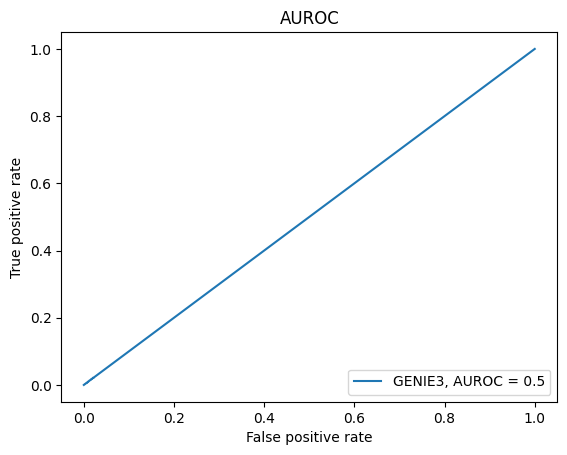

[0.5]

In [12]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [R_genie.to_numpy().flatten()], ["GENIE3"])

### 3.6 TIGRESS [4]

In [8]:
translation = pd.read_csv("data/breast/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_tigress = pd.DataFrame(0, index=motif.index, columns=motif.columns)
a = pd.read_csv("data/breast/R_tigress.csv", index_col = 0)
for tf in a.index:
    for g in a.columns:
        if a.at[tf, g] == 0:
            continue
        if tf not in tf_ids.keys():
            continue
        R_tigress.at[g, tf_ids[tf]] = a.at[tf, g]

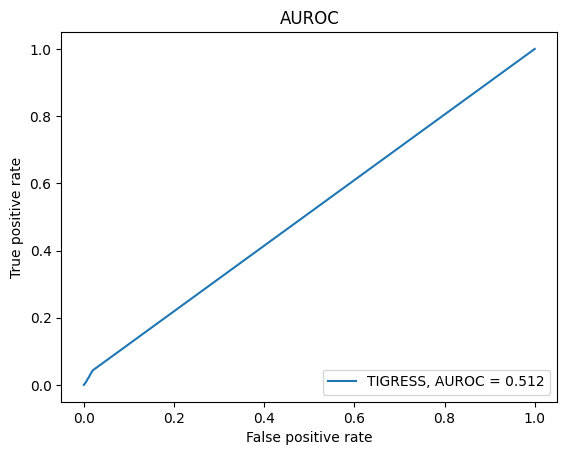

[0.512]

In [17]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [R_tigress.to_numpy().flatten()], ["TIGRESS"])

### BITFAM[5]

In [ ]:
translation = pd.read_csv("data/breast/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_bitfam = pd.DataFrame(0, index=motif.index, columns=motif.columns)
a = pd.read_csv("data/breast/R_bitfam.csv", index_col = 0)
for tf in a.columns:
    for g in a.index:
        if tf not in tf_ids.keys():
            continue
        R_bitfam.at[g, tf_ids[tf]] = a.at[g, tf]

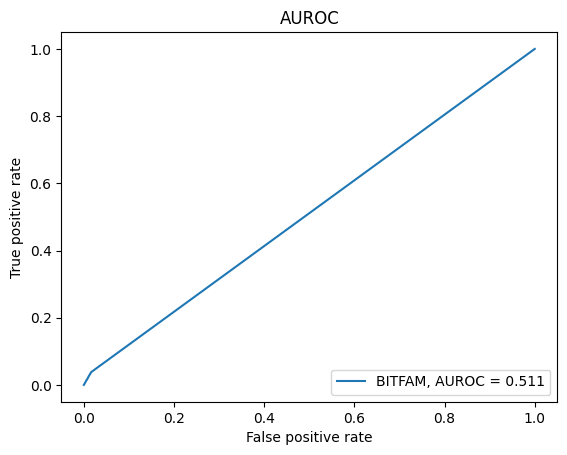

[0.511]

In [6]:
notebooks.plot_auroc(chip.to_numpy().flatten(), [R_bitfam.to_numpy().flatten()], ["BITFAM"])

### Results

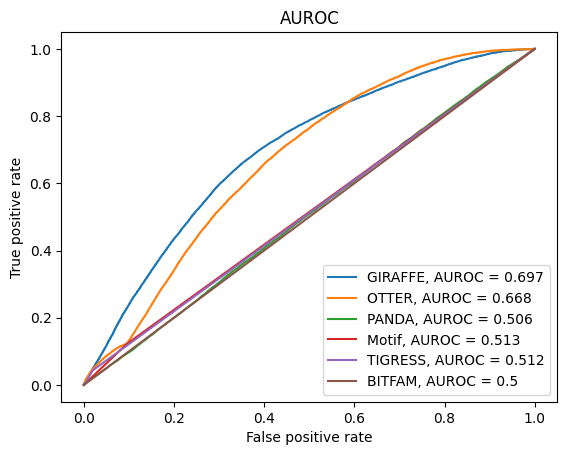

[0.697, 0.668, 0.506, 0.513, 0.512, 0.5]

In [18]:
notebooks.plot_auroc(chip.to_numpy().flatten(),
                    [R_giraffe.to_numpy().flatten(), R_otter.to_numpy().flatten(), R_panda.to_numpy().flatten(), motif.to_numpy().flatten(), R_tigress.to_numpy(),R_bitfam.to_numpy().flatten()],
                    ["GIRAFFE", "OTTER", "PANDA", "Motif", "TIGRESS", "BITFAM"])

## References

[1] Glass K, Huttenhower C, Quackenbush J, Yuan GC. "Passing Messages Between Biological Networks to Refine Predicted Interactions", PLoS One, 2013 May 31;8(5):e64832

[2] Weighill, Deborah, et al. "Gene regulatory network inference as relaxed graph matching." Proceedings of the... AAAI Conference on Artificial Intelligence. AAAI Conference on Artificial Intelligence. Vol. 35. No. 11. NIH Public Access, 2021.

[3] Huynh-Thu, Vân Anh, et al. "Inferring regulatory networks from expression data using tree-based methods." PloS one 5.9 (2010): e12776.

[4] Haury, Anne-Claire, et al. "TIGRESS: trustful inference of gene regulation using stability selection." BMC systems biology 6.1 (2012): 1-17.

[5] Gao, Shang, Yang Dai, and Jalees Rehman. "A Bayesian inference transcription factor activity model for the analysis of single-cell transcriptomes." Genome Research 31.7 (2021): 1296-1311.